# Homework 2 - The Best Book of all Time

In this notebook there are the solutions of the Group 10:  
Gianluca Procopio - 1942103  
Marina Zanoni - 1964213  
Emmanuele De Lucia - 2099678  
Eldar Gabdulsattarov - 2113224  

## Libraries

In [ ]:
import time
import math
import pandas as pd
import matplotlib.pyplot as plt
import json
from collections import Counter
from collections import defaultdict
import numpy as np
from datetime import datetime
from datetime import date
import re
from scipy import stats
import statsmodels.api as sm
from scipy.stats import norm
import seaborn as sns
from IPython.display import HTML


Some useful global variables

In [ ]:
CHUNK_SIZE = 10000
CHUNK_SIZE_AWS = 100
MAX_AUTHORS = 50

## Data

In [ ]:
!wget -P /content/drive/MyDrive/data https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_authors.json

--2023-10-18 12:34:12--  https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_authors.json
Resolving sapienza2023adm.s3.eu-south-1.amazonaws.com (sapienza2023adm.s3.eu-south-1.amazonaws.com)... 52.95.152.42, 52.95.151.12
Connecting to sapienza2023adm.s3.eu-south-1.amazonaws.com (sapienza2023adm.s3.eu-south-1.amazonaws.com)|52.95.152.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 549013002 (524M) [application/json]
Saving to: ‘/content/drive/MyDrive/data/lighter_authors.json.1’

lighter_authors.jso  16%[==>                 ]  88.00M  26.2MB/s    eta 20s    ^C


In [ ]:
!wget -P /content/drive/MyDrive/data https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_books.json

--2023-10-18 12:04:49--  https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_books.json
Resolving sapienza2023adm.s3.eu-south-1.amazonaws.com (sapienza2023adm.s3.eu-south-1.amazonaws.com)... 52.95.152.0, 52.95.152.38
Connecting to sapienza2023adm.s3.eu-south-1.amazonaws.com (sapienza2023adm.s3.eu-south-1.amazonaws.com)|52.95.152.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16123393395 (15G) [application/json]
Saving to: ‘/content/drive/MyDrive/data/lighter_books.json’

lighter_books.json  100%[===================>]  15.02G  24.1MB/s    in 10m 33s 

2023-10-18 12:15:22 (24.3 MB/s) - ‘/content/drive/MyDrive/data/lighter_books.json’ saved [16123393395/16123393395]



Run this line to enable the connection with google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Research Question

#RQ1

Before diving into any analysis or formulating research questions, it's essential to start by thoroughly examining the raw data. This initial step allows us to gain a clear understanding of the dataset, its structure, and potential anomalies. By doing so, we can make informed decisions about whether filtering or preprocessing is necessary, ensuring that our subsequent analyses are both accurate and meaningful

#LIGHTER_AUTHORS

##General information

In [ ]:
authors = pd.read_json("/content/drive/MyDrive/data/lighter_authors.json", lines=True)

In [ ]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   image_url           351767 non-null  object 
 10  about               351767 non-null  object 
 11  fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 32.2+ MB


In [ ]:
#Check for duplicates through the 'id' column which we assume to be reliable
len(authors['id'].unique())
#NO duplicates

351767


It is a dataframe of 12 columns and 351766 rows which contains information about

> *average_rating (float)*, *text_reviews_count (int)*, *work_ids (object)*, *book_ids (object)*, *works_count (int)*, *id (int)*, *name (object)*, *gender(object)*, *image_url (object)*, *about (object)*, *fans_count (int)*

In [ ]:
#Let's deepin more information about the dataset
authors.describe()
#It is suggested to press the "convert this tdataset to an interactive table" button

,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.517670e+05,351767.000000,351767.000000,3.517670e+05,3.517670e+05,351767.000000
mean,4.770586e+03,3.651194,330.993243,2.593714e+01,7.751861e+06,111.615731
std,9.769395e+04,1.211482,3857.539191,3.066083e+03,6.578409e+06,2661.018139
min,-4.100000e+01,-31.000000,0.000000,0.000000e+00,4.000000e+00,-33.000000
25%,6.000000e+00,3.600000,1.000000,2.000000e+00,1.535315e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000e+00,6.470396e+06,4.000000
75%,3.100000e+02,4.250000,53.000000,1.500000e+01,1.434041e+07,20.000000
max,2.700375e+07,5.000000,608956.000000,1.775176e+06,2.124802e+07,766035.000000


###SOMETHING WENT WRONG!


> ratings count negative values

> average rating negative values

> fans count negative values



##ratings count, average rating, fans count, text reviews count

In [ ]:
print("There are ",len(authors[authors['ratings_count']<0]),"negative values for RATINGS_COUNT")
print("There are ",len(authors[authors['average_rating']<0]),"negative values for AVERAGE_RATING")
print("There are ",len(authors[authors['fans_count']<0]),"negative values for FANS_COUNT")
print("As it can be hard to rember and boring to filter for these values during queries, let's set them to None.")

There are  4 negative values for RATINGS_COUNT
There are  1 negative values for AVERAGE_RATING
There are  23 negative values for FANS_COUNT
As it can be hard to rember and boring to filter for these values during queries, let's set them to None.


In [ ]:
authors.loc[authors['ratings_count'] < 0, 'ratings_count'] = None
print(len(authors[authors['ratings_count']<0]))
authors.loc[authors['average_rating'] < 0, 'average_rating'] = None
print(len(authors[authors['average_rating']<0]))
authors.loc[authors['fans_count'] < 0, 'fans_count'] = None
print(len(authors[authors['fans_count']<0]))

0
0
0


###Potential correlation between variables

Let's satisfy our curiosity and explore potential correlations between certain variables. We can begin by using the -describe- function to obtain essential summaries, which provide insights into the symmetry and ranges of the distribution for each quantitative variable. Along with these summaries, the function can generate relevant plots.

Upon examination, we observe that the distributions of variables like **ratings_count**, **average_rating**, **text_reviews_count**, and **works_count** appear to be asymmetric. Additionally, these distributions contain a significant number of zero entries, such as zero ratings, zero average ratings and zero work counts, along with some extreme high values.

We aim to test the following hypotheses:

*   Is there a correlation between the number of works by an author and the rating counts they receive? And what about text reviews count?
*   Could it be hypothesized that as much individuals leave text reviews more will leave ratings, and that books with more comments are also more shared and rated? We will investigate this as well.
*   Is there a significant correlation between the count of ratings and the average rating? This will help us understand if the quantity of ratings influences the average rating, or if these two variables are independent. Let's dive into our curiosity.

In [ ]:
###############################################
#1.1 Check that all authors has a rating count
len(authors['works_count'])==len(authors['ratings_count'])
#CORRELATION RATINGS_COUNT AND WORKS_COUNT (POINT 1)
ra_wk = authors['ratings_count'].corr(authors['works_count'])
print("Correlation of rating count and works count is ", round(ra_wk,3))
################################################################
#1.2 Correlation about text_review_count and rating_count
wc_trc = authors['works_count'].corr(authors['text_reviews_count'])
print("Correlation of works count and text review count is ", round(wc_trc,3))
##################################################################
#2. Check for correlation between ratings count and text reviews count
rc_trc = authors['ratings_count'].corr(authors['text_reviews_count'])
print("Correlation of rating count and text review count is ", round(rc_trc,3))
#########################################################################
#3. Check for correlation between ratings count and average rating
rc_ar = authors['ratings_count'].corr(authors['average_rating'])
print("Correlation of rating count and average rating is ", round(rc_ar,3))
#########################################################################

Correlation of rating count and works count is  0.01
Correlation of works count and text review count is  0.013
Correlation of rating count and text review count is  0.868
Correlation of rating count and average rating is  0.015


1.  Rating count and works counts are not correlated. We have few information about how this variables are collected. Writing more works doesn't imply, on average, having more scores
  -  we could guess the same result for correlation about work counts and text reviews count.
2. The correlation between rating count and text review count is quite strong (0.868). This implies that books with higher ratings tend to receive more text reviews, reflecting reader engagement and feedback.
3. The correlation between rating count and average rating is very weak. This suggests that the quantity of ratings has little impact on the average rating: having more ratings doesn't necessarily indicate whether they will be, on average, positive or negative.



Now we just had some more information and could model one of this quantitative variable but that's not of our interest at the moment. Let's instead check for the qualitative variable.


Nothing special about most other variables in the dataset of them, but we may check **gender** and **about**

##gender

In [ ]:
authors['gender'].unique()
#1. Quite specfic in same case, sometimes inappropriate  like "Muppet", "Questioning"
#and "Somewhere in the continuum" and unsuful information

#2. It can also be found some right answer in the incorrect format eventually with additional information
#like (He/him) or both 'male' and 'Male' as well as 'female' and 'Woman'

#CANNOT HIST AS IT IS
#plt.hist(authors['gender'])

#LET'S SPLIT INTO ONLY 3 CLASS "male","female","other"
#(just a practical, not too ethical solution)

array(['male', 'female', '', 'genderfluid', 'genderqueer',
       'transgender female', 'apache  Helicopter', 'Fiction', 'none',
       'Unknown', 'space dust', 'Non-Binary Transgender', 'non-binary',
       'Non-binary', 'Not specified', 'Neutral', 'Trans non binary guy',
       'nonbinary', 'Wife & Hubby Duo', 'Femme', 'NB', 'agender',
       'Nonbinary', 'Adrogynous', 'Genderfluid', 'them', 'Bigender',
       'Trans', 'other', 'Non-binary Woman', 'fluid', 'Non-Binary',
       'Learned', 'I exist', 'Male (FtM)', 'gender fluid', 'Bot',
       'Questioning', 'Agender', 'Genderless',
       'Somewhere on the continuum', 'Transgender', 'Pizza and Pretzels',
       'bigender', 'None', 'transmasculine', 'Fluid', "i'm a pretty birb",
       'non binary', 'Donkey Kong', 'The voice in your head',
       'gender nonconforming', 'transfeminine', 'Wolf',
       'transsexual female', 'Trans Masculine Non-binary', 'Master',
       'AMAB', 'Husband and Wife', 'Gender Neutral', 'Neutrois', 'Human',


In [ ]:
condition =(authors['gender'] != 'male') & (authors['gender'] != 'female')
wrong_entries =authors.loc[condition]
count = len(wrong_entries)
print('There are', count, 'wrong entries')
#proportion of uncategorized entries
print('The ratio of wrong entries is', round(count/len(authors),3))

There are 103710 wrong entries
The ratio of wrong entries is 0.295


In our dataset, we've grouped a variety of gender identities beyond binary categorizations into an 'Others' category. This acknowledges their diversity while simplifying analysis. We do not distinguish these responses, as they are not relevant to our survey's focus.

Filtering the data

In [ ]:
#authors.loc[authors['gender'] < 0, 'ratings_count'] = None
#print(len(authors[authors['gender']=='male']))
#print(len(authors[authors['gender']=='Male']))
#print(len(authors[authors['gender']=='female']))
#print(len(authors[authors['gender']=='Woman']))
authors.loc[authors['gender'] =='Male', 'gender'] = 'male'
#check if worked properly
#print(len(authors[authors['gender']=='male']))
#print(len(authors[authors['gender']=='Male']))
authors.loc[authors['gender'] =='Woman', 'gender'] = 'female'
authors.loc[authors['gender'] =='(He/Him)', 'gender'] = 'male'
authors.loc[authors['gender'] =='She/Her/Hers', 'gender'] = 'female'
authors.loc[authors['gender'] =='Nonbinary Woman', 'gender'] = 'female'
#print(len(authors[authors['average_rating']<0]))
#authors.loc[authors['fans_count'] < 0, 'fans_count'] = None
#print(len(authors[authors['fans_count']<0]))
authors.loc[condition==True, 'gender'] = 'other'


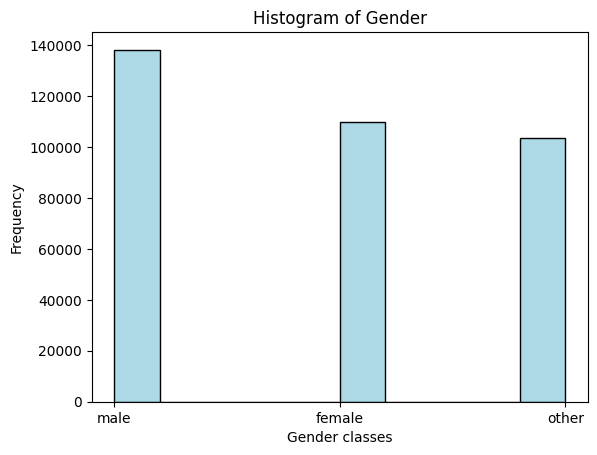

In [ ]:
plt.hist(authors['gender'], color='lightblue', edgecolor='black')
plt.xlabel('Gender classes')
plt.ylabel('Frequency')
plt.title('Histogram of Gender')
plt.show()

In [ ]:
print("Males' author rate is",  "{:.2%}".format(len(authors[authors['gender']=='male'])/len(authors)))
print("Female' author rate is", "{:.2%}".format(len(authors[authors['gender']=='female'])/len(authors)))
print("Others' author rate is","{:.2%}".format(count/len(authors)))

#If we know little of our society we could highly expect men to be in higher number than
#femal. Not too predictable maybe the 'others-rate'. By latest survey only 3% of the population identifies
#as non-binary. But some answers probably just wanted to undermine the concept of
#gender underlying the question

Males' author rate is 39.28%
Female' author rate is 31.24%
Others' author rate is 29.48%


"We noticed a diverse range of gender identities in our dataset and aimed to avoid unintended biases and discrimination when aggregating them into an 'Others' category.


To achieve this, we calculated conditional means, providing a nuanced view of **how gender identity may affect average ratings without making assumptions**. This approach ensures fairness and inclusivity in our analysis by exploring potential variations in ratings across different gender identities.


In [ ]:
#CONDITIONATE MEAN
authors.groupby('gender')['average_rating'].mean().round(2)
#on average female get values higher of 0.25, other 0.33 less then women
#(no std deviation) we don't know if it is significative

gender
female    3.84
male      3.61
other     3.51
Name: average_rating, dtype: float64

Of course the must mention that **to better understand the factors contributing to these variations, we should consider genre preferences, author gender, reading habits, sociocultural influences,  survey bias, personal experiences, and publication date**. Conducting additional analyses or surveys may offer a deeper understanding, and controlling for these factors can help isolate the impact of gender on ratings."

## about

In [ ]:
authors['about'].head()
#Just some information about the authors

0    Douglas Noël Adams was an English author, comi...
1    William McGuire "Bill" Bryson, OBE, FRS was bo...
2    Jude Fisher is the pseudonym for <a href="http...
3    James Hamilton-Paterson's work has been transl...
4    Mark Andrew Watson (born 13 February 1980) is ...
Name: about, dtype: object

Each row seems to contain a lot of information, just focus on the first one

In [ ]:
authors['about'][0]
#Just some information about the authors

'Douglas Noël Adams was an English author, comic radio dramatist, and musician. He is best known as the author of the <i>\n  <a href="https://www.goodreads.com/book/show/11.Hitchhiker_s_Guide_to_the_Galaxy" title="Hitchhiker\'s Guide to the Galaxy" rel="nofollow noopener">Hitchhiker\'s Guide to the Galaxy</a>\n</i> series. Hitchhiker\'s began on radio, and developed into a "trilogy" of five books (which sold more than fifteen million copies during his lifetime) as well as a television series, a comic book series, a computer game, and a feature film that was completed after Adams\' death. The series has also been adapted for live theatre using various scripts; the earliest such productions used material newly written by Adams. He was known to some fans as Bop Ad (after his illegible signature), or by his initials "DNA".<br /><br />In addition to <i>The Hitchhiker\'s Guide to the Galaxy</i>, Douglas Adams wrote or co-wrote three stories of the science fiction television series Doctor Who

It's seems html: let's check

In [ ]:
html_code = authors['about'][0]
HTML(html_code)

Importing the second dataset about books

#LIGHTER_BOOKS




##General information

In [ ]:
with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=1) as jreader:
    for chunk in jreader:
        chunk.info()
        break

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1 non-null      int64  
 1   title                      1 non-null      object 
 2   authors                    1 non-null      object 
 3   author_name                1 non-null      object 
 4   author_id                  1 non-null      int64  
 5   work_id                    1 non-null      int64  
 6   isbn                       1 non-null      int64  
 7   isbn13                     1 non-null      int64  
 8   asin                       1 non-null      object 
 9   language                   1 non-null      object 
 10  average_rating             1 non-null      float64
 11  rating_dist                1 non-null      object 
 12  ratings_count              1 non-null      int64  
 13  text_reviews_count         1 non-null      int64  
 14

Count the number of total input values

In [ ]:
with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    l=0
    for chunk in jreader:
      l += chunk.shape[0]

print(l)

7027431



Is a dataframe of 26 columns and 7027431 rows which contains information about> *id (int)*, *title (object)*, *authors (object)*, *author_name (object)*, *author_id (int)*, *work_id (int)*, *isbn (object)*, *asin(object)*, *language (object)*, *average_rating (float)*, *rating_dist (object)*, *rating_counts (int)*, *text_reviews_count (int)*, *publication_date (object)*, *original_publication_date (object)*, *format (object)*, *edition_information (object)*, *image_url (object)*, *publisher (object)*, *num_pages (object)*,*series_id (object)*, *series_name (object)*, *series_position (object)* ,*series_shelves (object)*, *description (object)*


> we notices that num_pages is object type and not int

> we should check also for rating dist. We could think of a dictionary, list or other formats... Indeed we need to check

> isbn is an object type, not a number






##title

In [ ]:
titles = pd.DataFrame()  # Initialize a variable to count non-conforming dates
#info_books = pd.DataFrame()
with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        chunk['title'] = chunk['title']
        titles = pd.concat([titles,chunk['title']])
        #break
titles = titles.rename(columns={0: 'titles'})

In [ ]:
titles.describe()

,titles
count,7027431
unique,4151215
top,Pride and Prejudice
freq,1266


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('titles').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

We can see that about half of the entries are unique.

Expplore title by its length

In [ ]:
# Store the computed length of the titles in a new column 'len_titles'
titles['len_title'] = titles['titles'].apply(lambda x: len(x))

In [ ]:
titles.columns

Index(['titles', 'len_title'], dtype='object')

In [ ]:
titles.head()

,titles,len_title
0,Harry Potter and the Order of the Phoenix (Har...,60
1,Harry Potter and the Sorcerer's Stone (Harry P...,56
2,Harry Potter and the Chamber of Secrets (Harry...,58
3,Harry Potter and the Prisoner of Azkaban (Harr...,59
4,Harry Potter and the Goblet of Fire (Harry Pot...,54


(array([3180572., 2349164.,  918778.,  305938.,  122742.,   97151.,
          16525.,   11029.,   10948.,   14584.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

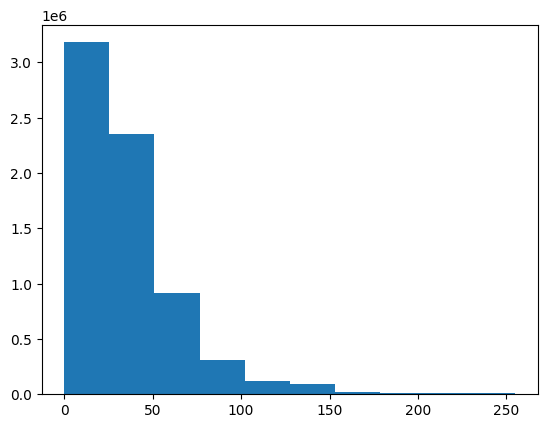

In [ ]:
plt.hist(titles['len_title'])

##original publication date
It is reasonable to think that original publication refers to the first publication of the books.

**Comparison publication date and original publication date**: we expect to see same title of a book if has different publications date (the original publication date but also other publication date) f.i. when a book is repubished o translated. Of course the books will have different id.

In [ ]:
pattern = '^\d{4}'
w1 = []  # Initialize a variable to count non-conforming dates
#info_books = pd.DataFrame()
with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        chunk = chunk['original_publication_date']
        for date in chunk:
            if not re.match(pattern, date):
               w1.append(date)
        break
achtung= set(w1)
print(achtung)

{'', '-316', '-317', '-84', '-385', '-400', '-38', '-750', '116', '-29', '70-01-01', '-446', '-184', '60', '818', '08-01', '150', '64-01-01', '350', '17', '-380-01-01', '-46', '-401', '-55', '10', '-400-01-30', '-369', '54', '127', '68', '-195', '-390', '-472', '-438', '94', '09-07-01', '-1445', '140', '39', '-413', '90', '-405', '-560', '-430', '-60', '-39', '95', '102', '-391', '12', '700', '61', '-250', '200-11-01', '396', '-431', '-335', '-700', '-67', '-409', '-1000', '-98', '-54', '11', '-206', '120', '416', '01-01-01', '393', '199-03-01', '65', '100', '-429', '420', '-24', '-20', '400', '158', '382', '-361', '132', '-421', '80', '-550', '-388', '-45', '-424', '109', '551', '430', '868', '-414', '-420', '-412', '-160', '-43', '-408', '390', '-386', '530', '-27', '-26', '425', '-600', '-415', '272-01-01', '-399', '974', '108', '-30', '-1550', '356-01-01', '-495', '650', '-11', '08', '194', '-800', '-10', '50', '-12', '-260', '-212', '731', '121', '-425', '-280', '-411', '09-07-16'

##publication date
Let's check for the format. The date we absolute prefer is datetime data %YY%M%GG, so we check for values which do not follow this rule.

In [ ]:
# Initializing a counter
wrongdates = 0

with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        chunk = chunk['publication_date']
        if not pd.to_datetime(chunk, errors='coerce', format='%YYYY%MM%DD').notna().any():
            wrongdates += 1

print("Number of non-conforming dates:", wrongdates)

Number of non-conforming dates: 703


**When not all information about YY,M,GG are requested sometimes there's the year available**.

We find that all date to be considered of any **logic sense must start with 4 digits**.

We see how the following are meaningless. We will use also this pattern later one to check for valid dates. When needed we will drop each date which does not start with a substring of 4 digits.

In [ ]:
pattern = '^\d{4}'
wrongdates = []  # Initialize a variable to count non-conforming dates
#info_books = pd.DataFrame()
with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        chunk = chunk['publication_date']
        for date in chunk:
            if not re.match(pattern, date):
               wrongdates.append(date)
     #   break
achtung= list(set(wrongdates))
print(set(achtung[1:15]))


{'199-06', '02-01-01', '02-07-22', '05-03-03', '201', '214-10-15', '15-03-15', '202-08', '302', '201-10-09', '191', '13-10-20', '270', '12-03-02'}



**Example of value we'd want to replace** are


- 3 consequent digits like '201'  doesn't make sense for us

- sequences of three duplets like '14-11-01' are at least ambigous in most cases. Assuming the firs duplet addresses an year: is it 1814, 1914, 2014?

In [ ]:
pattern =  '^(?!\d{4})'
#Creating a dataframe for filtered_data
years = pd.DataFrame()

with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=20) as jreader:
    for chunk in jreader:
        # Removing empty strings
        chunk.loc[chunk['publication_date'] =='', 'publication_date'] = None
        # Selecting the interested column
        chunk = chunk['publication_date']
        # Selecting only valid date as far as what we discussed here
        years['years'] = chunk[~chunk.str.match(pattern, na=False)]

## language

Investigating language-variable input

In [ ]:
# Initialing an empty list to store all languages
lang= []

with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize= CHUNK_SIZE) as jreader:
    for chunk in jreader:
         col = chunk['language'].unique()
         for elem in col:
            lang.append(elem)

printing some *interesting* values

In [ ]:

# Access only distinct values
lan=list(set(lang))

#Print the first some interesting values within the list
print(lan[10:30])


['mun', 'grc', 'dan', 'lat', 'en-US', 'enm', 'heb', 'ita', 'eng', 'wel', 'jpn', 'en-GB', 'rus', 'ara', 'mul', 'tur', 'ger', 'gre', 'zho', 'en-CA']


For the purpose of filtering we went through all possible values and noticed some anomalies such as :
-  $\texttt{'--'}$
-  $\texttt{'Select...'}$
- $\texttt{''}$

Furthermore we found different entries which address the same language.

For instance with english we have: $\texttt{'eng'}$ but also...


> $\texttt{'eng-GB'}$

> $\texttt{'eng-US'}$

> $\texttt{'eng-CA'}$

> $\texttt{'en'}$

In [ ]:
language= pd.DataFrame()

# Reading the hole dataset chunk by chunk
with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=CHUNK_sIZE) as jreader:
    # For each chunk performing filtering operation
    for chunk in jreader:
        chunk.loc[chunk['language'] =='', 'language'] = None
        chunk.loc[chunk['language'] =='Select...', 'language'] = None
        chunk.loc[chunk['language'] =='--', 'language'] = None
        language= chunk['language']

###same book can have different translation or edition (pubication date)

We check wether there are repeated titles because of different translation of the book.

I count the number of books having the same title that are shown multiple time because the have a different language or different pubblication date


In [ ]:
# Setting a counter
l= Counter()

with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=300) as jreader:
    for chunk in jreader:
        chunk = chunk[['id','title','language','publication_date']][150:300].drop_duplicates()
        l.update(chunk['title'])
        for title, repet in l.items():
            if repet>1:
                print(chunk[['id','language','publication_date']][chunk['title']==title])
        break


      id language publication_date
173  231      eng       2005-08-30
174  232      eng                 
      id language publication_date
198  264      eng       2003-09-30
199  266      eng       2006-06-25
200  268                1999-09-16
201  269      eng       2004-01-16
202  270                2001-04-16
204  273                1996-12-01
205  274                          
      id language publication_date
223  295      eng       2001-09-15
224  296      eng       2004-10-01
225  297      eng       2005-06-01
226  298      eng       2003-07-01
227  299    en-US       2002-09-03
228  300      eng       2005-05-25
229  301      eng       2005-03-01
      id language publication_date
236  320      eng       2003-06-24
241  326      eng       1998-03-21
      id language publication_date
238  322      spa                 
239  324      spa       1990-01-01
240  325      spa          2000-11
      id language publication_date
265  357      eng       1991-02-15
271  363            

We have some cases:

> same book, same title, same language different pubblication date

> same book, same title, same language NO pubblication date

> same book, same title, different language (and eventually NO pubblication date)


## num pages

In the following code we are questioning all unique values in order to understand the best approach to trim uncorrect values.

We observe that

>There aren't negative values

>There are some missing values, which would just convert to None

> Some values are equal to 0, which is also worst

It's easy to see that *the empty string* it's a missing value. More problematic is 0. Of course it makes no sense for a book to have 0 pages.

We make the hypothesis that zero is a missing values as we've checked that for the corrisponding row in the dateset there is some information stored.

This is an important operation if we want to take numerical summaries for this variable. The 0-values will currupt the mean, variance, etc as more they are.

In [ ]:
pages  = pd.DataFrame()

with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        # Convert 'num_pages' to numeric and store in the dataset pages
        chunk['num_pages'] = pd.to_numeric(chunk['num_pages'], errors='coerce')
        pages= pd.concat([pages,chunk['num_pages']])
       # break
pages = pages.rename(columns={0: 'pag'})


Before removing them (0s), let's see how many they are!

In [ ]:
# Count zero pages
zeropages = pages[pages['pag'] ==0].count()
print('Books with 0 pages are:',zeropages)

pag    27409
dtype: int64

In [ ]:
#percentage
print('{:.2%}'.format(27409/7027431))
#the missing values are around 4%

0.39%


In [ ]:
# Cleaning the 'num_pages' column
pages.loc[pages['num_pages'] == '', 'num_pages'] = None
pages.loc[pages['num_pages'] == 0, 'num_pages'] = None

Let's get some summary of the filtered data

In [ ]:
pages.describe()

,pag
count,3.928187e+06
mean,3.071146e+03
std,2.335824e+06
min,1.000000e+00
25%,1.340000e+02
50%,2.340000e+02
75%,3.450000e+02
max,2.147484e+09


Not too filtered actually. We can se the values between the third and first quartile are between 134 and 345, but mean is 3071. Is not that strange if you see for the maximum value: 2147484000. We filter the data up to 3000 pages

In [ ]:
print('original mean:', round(pages['pag'].mean()))
print('The range of number of ages is between', round(pages['pag'].min()),'and',round(pages['pag'].max()))

original mean: 3071
The range of number of ages is between 1 and 2147483647


In [ ]:
# Define 1000 as upper limit
upper_limit = 3000

# Filter the 'pag' column to include only values within the specified range
filtered_pages = pages[pages['pag'] <= upper_limit]

Let's try again with filtered data

In [ ]:
print('The average number of pages is', round(filtered_pages['pag'].mean()))
print('The average number of pages is', round(filtered_pages['pag'].std()))


The average number of pages is 264
The average number of pages is 205


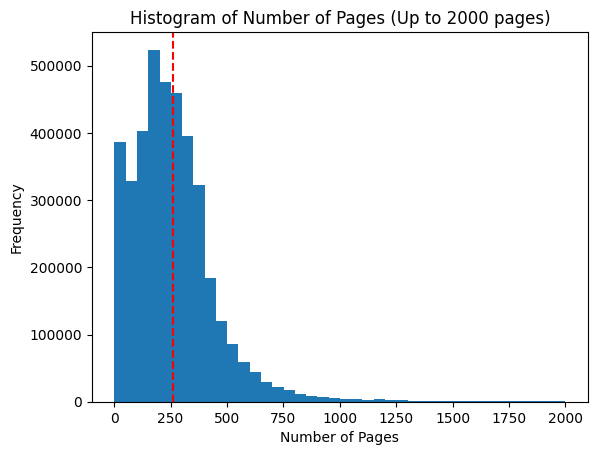

In [ ]:
# Define 1000 as upper limit
upper_limit = 2000

# Filter the 'pag' column to include only values within the specified range
filtered_pages = pages[pages['pag'] <= upper_limit]

# Create a histogram of the filtered 'pag' values
plt.hist(filtered_pages['pag'], bins=40)
# Add labels and a title
plt.xlabel('Number of Pages')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Pages (Up to ' + str(upper_limit) + ' pages)')

# Adding the mean
plt.axvline(x=m, color='r', linestyle='--', label='Horizontal Line at y=10')

# Display the histogram
plt.show()


It is wide spread, with a very long righ tail. The maximum value is much higher than the third quartile (75th percentile), and the spread of the data is wide:
- Max ≈ 2,147,484,000
- 75th percentile (Q3) ≈ 345

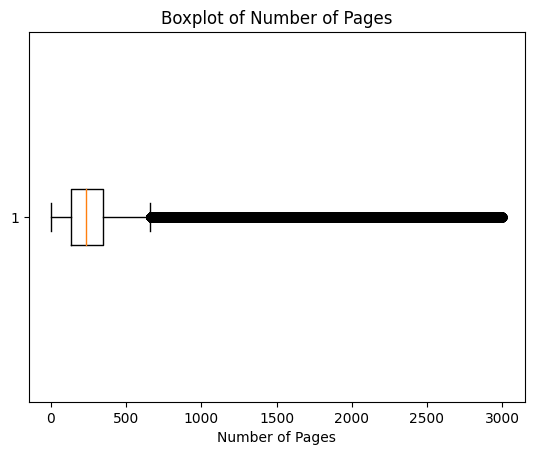

In [ ]:
# Create a boxplot of the 'pag' data
plt.boxplot(filtered_pages['pag'], vert=False)  # 'vert=False' for a horizontal boxplot

# Add labels and a title
plt.xlabel('Number of Pages')
plt.title('Boxplot of Number of Pages')

# Display the boxplot
plt.show()


The data is positively skewed. Indeed the mean is greater than the median (50th percentile).
-  Mean ≈ 3,071.15
-  Median (50th percentile) ≈ 234

##rating dist
according to the ouput it is a distribution for each rate. It return for each value in rating scale {1,2,3,4,5} a number of rating acquired.

In [ ]:
#sampling only on the first 6 rows
with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=6) as jreader:
    for chunk in jreader:
        chunk = chunk['rating_dist']
        print('the book has rating',chunk)
        break

the book has rating 0    5:1674064|4:664833|3:231195|2:41699|1:16215|to...
1    5:4801606|4:1681521|3:623286|2:145898|1:125040...
2    5:1690166|4:781011|3:313727|2:54687|1:15453|to...
3    5:1994597|4:696545|3:212678|2:28915|1:13959|to...
4    5:1808039|4:663849|3:193604|2:27759|1:12425|to...
5        5:25063|4:4467|3:1103|2:227|1:282|total:31142
Name: rating_dist, dtype: object


Check if:

*   There are some rows with tot = 0
*   5 counts + 4 counts + ... + 1 counts = tot counts





In [ ]:
import re
pat = r':(\d+)$'
pat1 = r':(\d+)|total:'
# Counter for tot=0 values
c = 0
# Counter for partial rating dist which sum is not equal to total
csum = 0

#sampling only on the first 6 rows
with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
            chunk = chunk['rating_dist']
            for value in chunk:
                matches = re.findall(pat, value)
                if matches[0]=='0':
                    c +=1
                mat = re.findall(pat1,value)
                if mat[0]!='' and mat[1] !='' and mat[2]!='' and mat[3]!='' and mat[4]!='':
                    if (int(mat[0]) + int(mat[1]) + int(mat[2]) + int(mat[3]) + int(mat[4])) != int(matches[0]):
                        csum +=1
            #break

print('There are', c,'not rated books')
print('There are', csum,'partial ratings which do not match total ones')

There are 1010279 not rated books
There are 0 partial ratings which do not match total ones


##series id
just checking for the first row values in order to get an idea of the possible description of the variable. We see that a lot of empty values or repeated ids. We can assume that some books are not part of the series and each book which instead is in a series share the same id.

In [ ]:
#discover series_id variable
with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=10) as jreader:
    series_id=[]
    for chunk in jreader:
        chunk = chunk['series_id']
        for elem in chunk:
            series_id.append(elem)
        print(series_id)
        break


['45175', '45175', '45175', '45175', '45175', '45175', '', '45175', '40957', '40957']


There are empty values for non series book.

##series shelves

In [ ]:
# Initializing a counter for negative values
cn = 0
with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=3) as jreader:
    for chunk in jreader:
        chunk = chunk['shelves'][0]
        print(chunk)
        break

[{'name': 'to-read', 'count': 324191}, {'name': 'currently-reading', 'count': 52675}, {'name': 'fantasy', 'count': 48251}, {'name': 'favorites', 'count': 38332}, {'name': 'young-adult', 'count': 15837}, {'name': 'fiction', 'count': 13971}, {'name': 'harry-potter', 'count': 9798}, {'name': 'books-i-own', 'count': 8230}, {'name': 'owned', 'count': 7664}, {'name': 'ya', 'count': 5790}, {'name': 'series', 'count': 4859}, {'name': 'favourites', 'count': 4359}, {'name': 'magic', 'count': 3985}, {'name': 'childrens', 'count': 2955}, {'name': 're-read', 'count': 2396}, {'name': 'owned-books', 'count': 2277}, {'name': 'adventure', 'count': 2097}, {'name': 'audiobook', 'count': 1910}, {'name': 'children', 'count': 1901}, {'name': 'audiobooks', 'count': 1792}, {'name': 'middle-grade', 'count': 1760}, {'name': 'childhood', 'count': 1578}, {'name': 'j-k-rowling', 'count': 1540}, {'name': 'my-books', 'count': 1405}, {'name': 'classics', 'count': 1372}, {'name': 'reread', 'count': 1341}, {'name': 'ch

It is a dictionary woth the name of the shelve and the corrispondent number of books within it

##edition information

In [ ]:
edition = pd.DataFrame()  # Initialize a variable to count non-conforming dates
#info_books = pd.DataFrame()
with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        chunk['edition_information'] = chunk['edition_information']
        edition = pd.concat([edition,chunk['edition_information']])
      #  break
edition = edition.rename(columns={0: 'info'})

In [ ]:
edition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7027431 entries, 0 to 7027430
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   info    object
dtypes: object(1)
memory usage: 107.2+ MB


In [ ]:
edition.describe()

,info
count,7027431
unique,140133
top,
freq,6465533


here's a core information: the vst majority of the valus are missing

In [ ]:
print('there are exactly','{:.2%}'.format(6465533/7027431),'missing values')

there are exactly 92.00% missing values


In [ ]:
# We see lot of missing values only in the first ten rows
edition[1:10]

,info
1,Library Edition
2,
3,
4,First Scholastic Trade Paperback Edition
5,Box Set
6,
7,Box Set
8,Movie Tie-In Edition
9,


In [ ]:
ed_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561898 entries, 0 to 7027430
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   info    561898 non-null  object
dtypes: object(1)
memory usage: 8.6+ MB


In [ ]:
print('There are 561898 non-empty entries whose',561898-140132,'are repetitions')

There are 561898 non-empty entries whose 421766 are repetitions


In [ ]:
ed_values = edition[(edition['info']!='') & (edition['info']!=None)]
ed_values[1:20]

,info
1,Library Edition
4,First Scholastic Trade Paperback Edition
5,Box Set
7,Box Set
8,Movie Tie-In Edition
11,25th Anniversary
13,Unabridged
14,Dramatization edition; unabridged
15,First Edition
16,"Dramatization edition; Unabridged, 2 CDs"


In [ ]:
#Number of box series
print('There are' ,sum(ed_values['info']=='Box Set'), 'edition of book which are Box Set')
#Number of First Edition
print('There are' ,sum(ed_values['info']=='First Edition'), 'edition of book which are First Edition')
#Number of New Edition
print('There are' ,sum(ed_values['info']=='New Edition'), 'edition of book which are New Edition')
#Number of Movie Tie
print('There are' ,sum(ed_values['info']=='Movie Tie-In Edition'), 'edition of book which are Movie Tie-In Edition')
#Number of 25th Anniversary
print('There are' ,sum(ed_values['info']=='25th Anniversary'), 'edition of book which are 25th Anniversary')
#Number of 50th Anniversary
print('There are' ,sum(ed_values['info']=='50th Anniversary'), 'edition of book which are 50th Anniversary')

There are 207 edition of book which are Box Set
There are 12438 edition of book which are First Edition
There are 484 edition of book which are New Edition
There are 174 edition of book which are Movie Tie-In Edition
There are 9 edition of book which are 25th Anniversary
There are 13 edition of book which are 50th Anniversary


# RQ2



## Plot the number of books for each author in descending order.



In order to keep the plot clean and understandable, i will plot only the first 'MAX_AUTHORS' authors.

<Axes: title={'center': 'Number of books for each author in descending order'}, xlabel='id'>

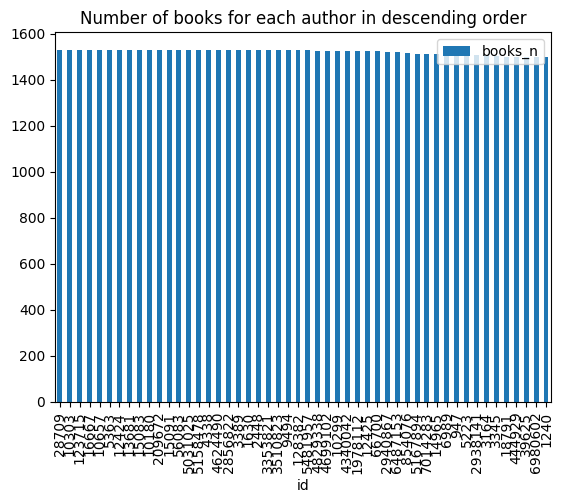

In [ ]:
authors = pd.read_json("/content/drive/MyDrive/data/lighter_authors.json", lines=True)
authors = authors[['id','book_ids']]

authors['books_n'] = authors['book_ids'].apply(len)
authors = authors.sort_values(by='books_n', ascending=False).head(MAX_AUTHORS)

authors.plot(x='id', y='books_n', kind='bar', title='Number of books for each author in descending order')

## Which book has the highest number of reviews?

In [ ]:
max_df = pd.DataFrame()
with pd.read_json("/content/drive/MyDrive/data/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        chunk = chunk[['title', 'ratings_count']]
        maximum = max(chunk['ratings_count'])
        max_df = pd.concat([max_df,chunk[chunk['ratings_count'] == maximum]])
        #break # remove break to perform the operation on every element

print(max_df[max_df['ratings_count'] == max(max_df['ratings_count'])])

                                                     title  ratings_count
5236525  Harry Potter und der Stein der Weisen (Harry P...        7400639


## Which are the top ten and ten worst books concerning the average score?

In the code below i considered only the books with at least one rating. Then I sorted them by the 'average_rating' and then by the 'ratings_count', so that if there are more books with the same rating I will choose the ones with a greater number of ratings. Personally I think that's fair to choose a second sorting parameter because there are a lot of boooks with the same rating and I have to choose only 10 among them. Among the top rated books I choose first the ones with the higher average ratings and I sort them based on who got the most ratings, while among the worst book first I choose the ones with the lower average ratings and then I sort them choosing first the ones with more reviews.

In [ ]:
top = pd.DataFrame()
worst = pd.DataFrame()
with pd.read_json("/content/drive/MyDrive/data/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        chunk = chunk[['title', 'average_rating','ratings_count']]
        chunk = chunk[chunk['ratings_count'] > 0]
        sorted_chunk = chunk.sort_values(by=['average_rating','ratings_count'], ascending=[False,False])
        top = pd.concat([top,sorted_chunk.iloc[:10]],axis=0)
        worst = pd.concat([worst,sorted_chunk.iloc[-10:]],axis=0)

print(top.sort_values(by=['average_rating','ratings_count'], ascending=[False,False]).reset_index(drop=True).iloc[:10])
print('\n')
print(worst.sort_values(by=['average_rating','ratings_count'], ascending=[True,False]).reset_index(drop=True).iloc[:10])

                                               title  average_rating  \
0  Optimized Nutrition:: A strategic guide for th...             5.0   
1  Optimized Nutrition Vol. 4: Building a Bigger ...             5.0   
2  Optimized Nutrition Vol. 5 Building a huge big...             5.0   
3                         Optimized Nutrition Vol. 6             5.0   
4                         Optimized Nutrition Vol. 7             5.0   
5  Optimized Nutrition Vol. 8: Building Anabolic ...             5.0   
6                                               Mora             5.0   
7  A Muezzin from the Tower of Darkness Cries: Tr...             5.0   
8       Children's Virtues N is for Nobility Book 14             5.0   
9              Children's Virtues: N is for Nobility             5.0   

   ratings_count  
0            216  
1            211  
2            174  
3            169  
4             69  
5             63  
6             55  
7             53  
8             53  
9             53 

## Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.

In [ ]:
lang = pd.DataFrame()
with pd.read_json("/content/drive/MyDrive/data/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        chunk = chunk[['id','language']]
        chunk = chunk[chunk['language'] != '']
        chunk = chunk[chunk['language'] != 'Select...']

        chunk.loc[chunk['language'] =='en-CA', 'language'] = 'eng'
        chunk.loc[chunk['language'] =='en', 'language'] = 'eng'
        chunk.loc[chunk['language'] =='en-US', 'language'] = 'eng'
        chunk.loc[chunk['language'] =='en-GB', 'language'] = 'eng'

        grouped = chunk[chunk['language'] != '--'].groupby('language').size().reset_index(name='count')
        lang = pd.concat([lang,grouped],axis=0)

lang = lang.groupby('language').sum().reset_index()

Now I divide the results into 3 dataset so that I will have three clear and understandable plots.

In [ ]:
lang_1 = lang[lang['count'] > 1000]
lang_2 = lang[(lang['count'] <= 1000) & (lang['count'] >= 5)]
lang_3 = lang[lang['count'] < 5]

How languages are distribuited throughout the library (count > 10000)

Text(0.5, 1.0, 'How languages are distribuited throughout the library (count > 1000)')

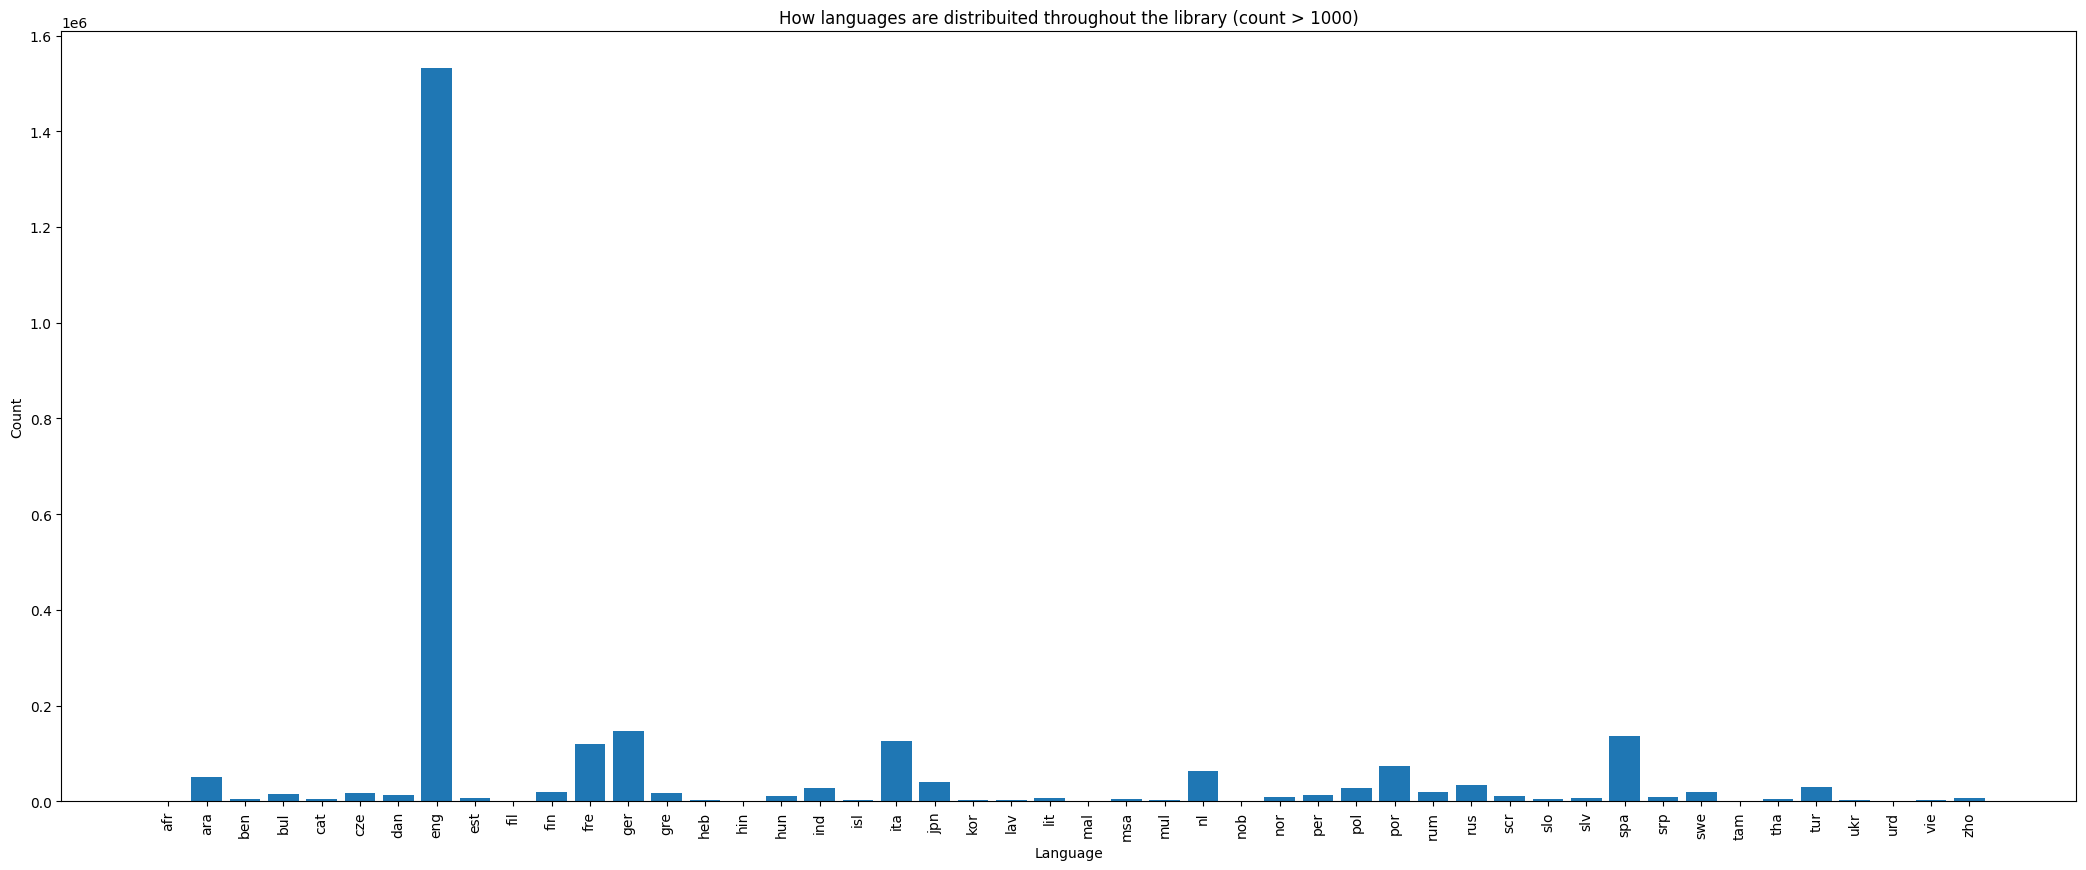

In [ ]:
plt.figure(figsize=(26, 10))
plt.bar(lang_1['language'],lang_1['count'])
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('How languages are distribuited throughout the library (count > 1000)')

How languages are distribuited throughout the library (5 <= count <= 10000)

Text(0.5, 1.0, 'How languages are distribuited throughout the library (5 <= count <= 10000)')

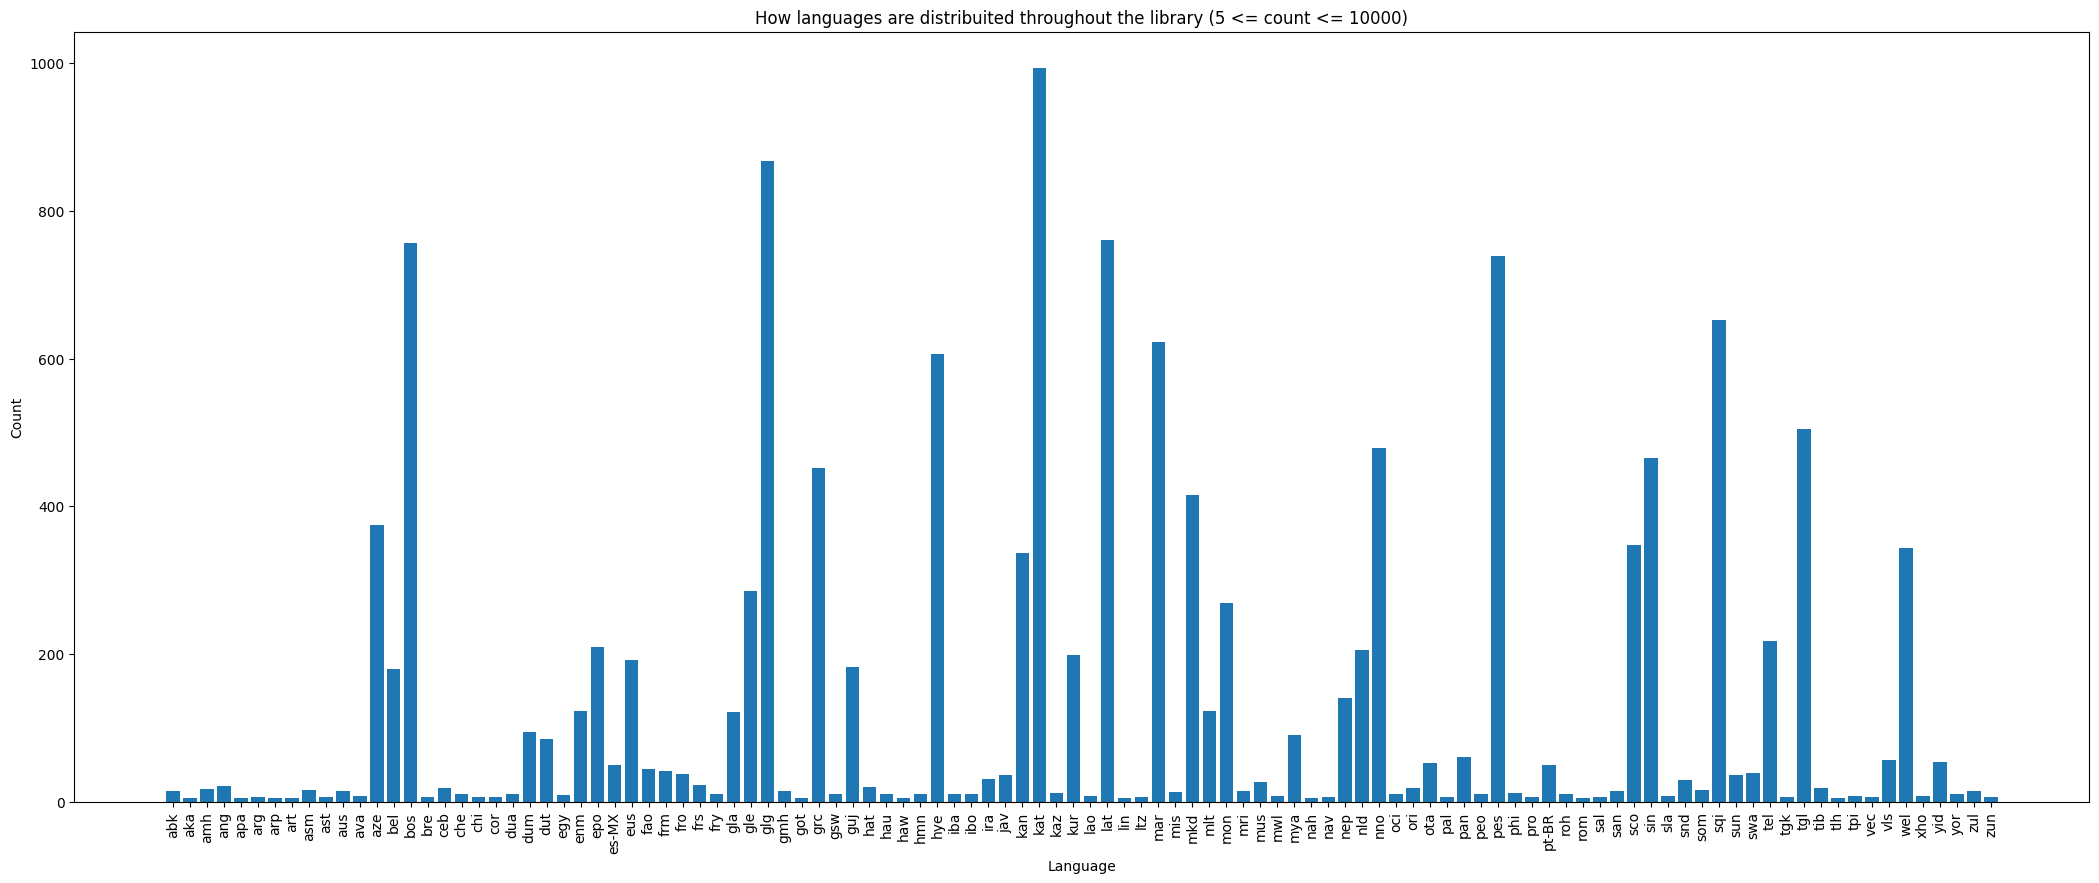

In [ ]:
plt.figure(figsize=(26, 10))
plt.bar(lang_2['language'],lang_2['count'])
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('How languages are distribuited throughout the library (5 <= count <= 10000)')

In the end, we can find the languages that appear less than 5 times

Text(0.5, 1.0, 'How languages are distribuited throughout the library (count < 5)')

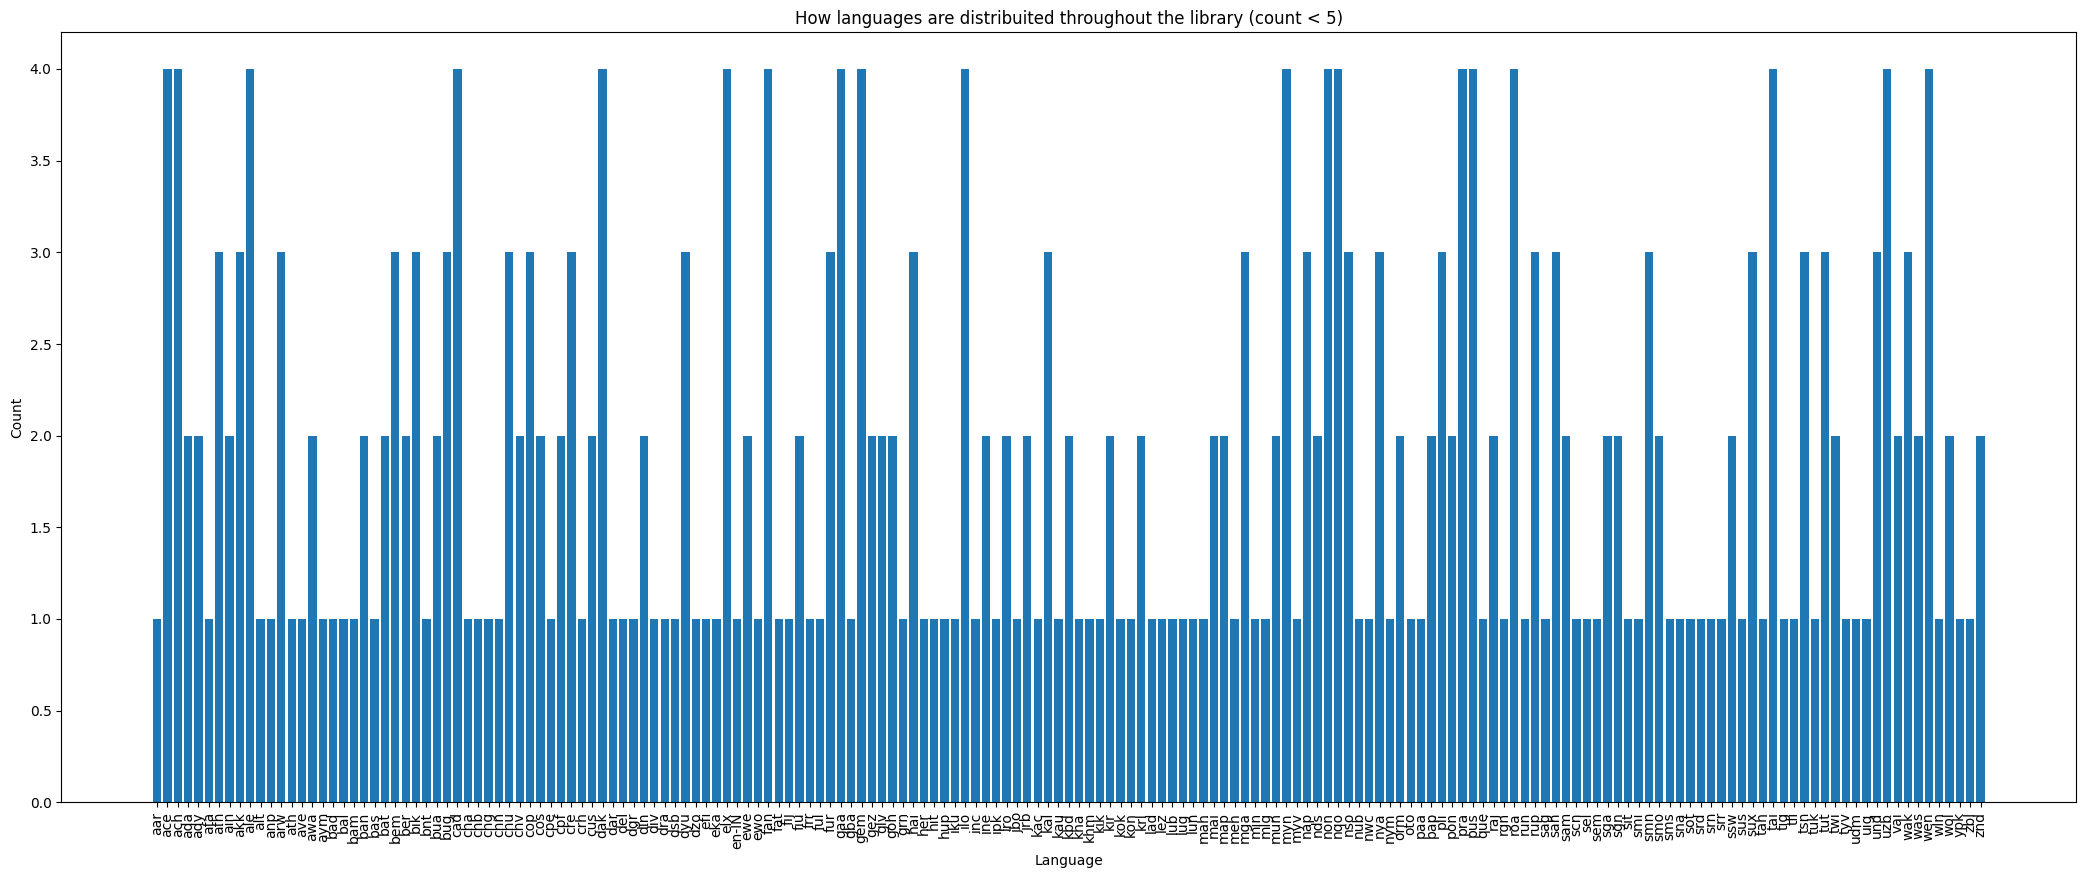

In [ ]:
plt.figure(figsize=(26, 10))
plt.bar(lang_3['language'],lang_3['count'])
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('How languages are distribuited throughout the library (count < 5)')

## How many books have more than 250 pages?

In [ ]:
count = 0
with pd.read_json("/content/drive/MyDrive/data/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        chunk = chunk[chunk['num_pages'] != '']
        count += chunk[chunk['num_pages'].apply(int) > 250].shape[0]
print('Total number of books that have more than 250 pages: ' + str(count))

Total number of books that have more than 250 pages: 1810335


## Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books).


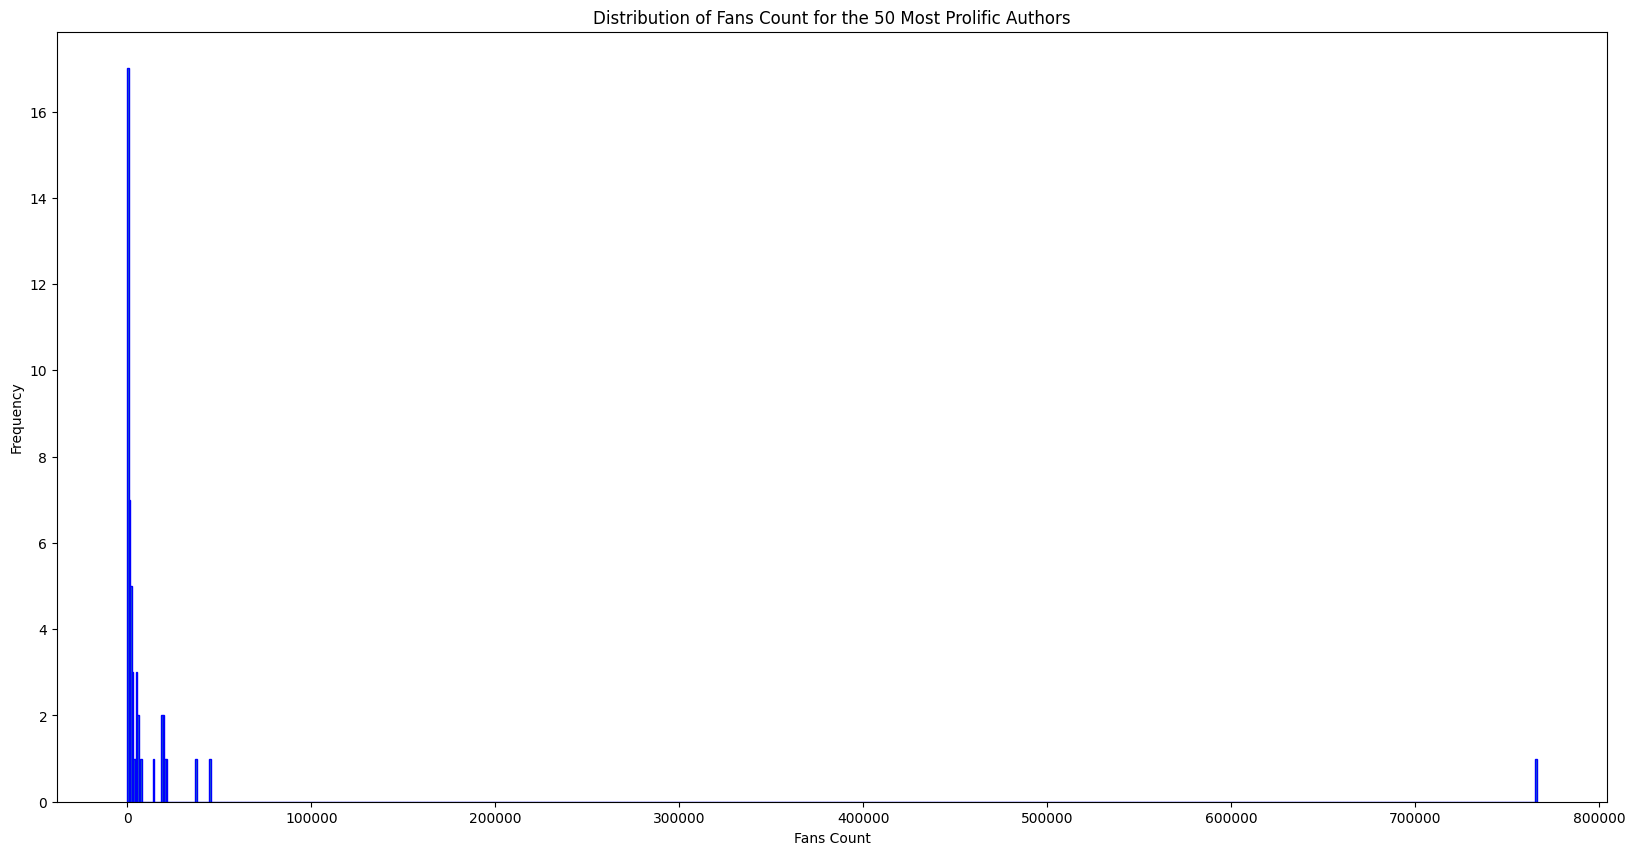

In [ ]:
authors = pd.read_json("/content/drive/MyDrive/data/lighter_authors.json", lines=True)

authors = authors[['id','book_ids','fans_count']]

authors['books_n'] = authors['book_ids'].apply(len)
authors = authors.sort_values(by='books_n', ascending=False)[:50]

plt.figure(figsize=(20, 10))
plt.hist(authors['fans_count'],bins=1000,edgecolor='b')
plt.xlabel('Fans Count')
plt.ylabel('Frequency')
plt.title('Distribution of Fans Count for the 50 Most Prolific Authors')
plt.show()

# RQ3

## Write a function that takes as input a year and returns as output the following information:


Input and initialize Data Frame:

In [ ]:
year = 'a'
while year.isalpha():
  year = str(input())

df = pd.DataFrame()

2015


Output:

In [ ]:
num_books = 0
tot_pages = 0
longest_book = ('',0)
prolific_month = pd.DataFrame()

def historical_look(year,chunk):
    # prepare data, clean the chunk
    filtered = chunk[chunk['year'] == year].reset_index(drop=True)

    # number of books for that year
    books = filtered[['title','year']]

    # most prolific month
    months = filtered[['month']]
    months = months.groupby('month').size().reset_index(name='count')

    # total number of pages written that yeat
    pages = filtered[filtered['num_pages'] != '']
    pages = pages[['title','num_pages']]
    pages.astype({'num_pages': 'int32'}).dtypes
    massimo = pages['num_pages'].max()

    # compute results
    l_book = (pages[pages['num_pages'] == ]['title'], massimo)
    n_books = books.shape[0]
    t_pages = pages['num_pages'].sum()
    return  n_books, t_pages, l_book, months

with pd.read_json("/content/drive/MyDrive/data/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        chunk = chunk[['title','num_pages','original_publication_date']]
        #filter only the dates that respect the given format YYYY-MM-DD
        filtered = chunk[chunk['original_publication_date'].str.match('\d{4}-\d{2}-\d{2}')].reset_index(drop=True)
        #convert every date from string to a date object
        filtered['original_publication_date'] = filtered['original_publication_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').date())
        filtered.reset_index(drop=True)


        filtered['year'] = filtered['original_publication_date'].apply(lambda x: str(x.year))
        filtered['month'] = filtered['original_publication_date'].apply(lambda x: str(x.month))
        filtered['day'] = filtered['original_publication_date'].apply(lambda x: str(x.day))

        n_books, t_pages, l_book, p_month = historical_look(year,filtered)

        num_books += n_books
        tot_pages += t_pages
        longest_book = l_book if l_book[1] > longest_book[1] else longest_book

        prolific_month = pd.concat([prolific_month,p_month],axis=0).groupby('month').sum()

print(num_books)
print(tot_pages)
print(longest_book[0] + ', ' + str(longest_book[1]))
print(prolific_month[prolific_month['count'] == prolific_month['count'].max()])


117779
14013926
257    Revel for the American Nation: A History of th...
Name: title, dtype: object
       count
month       
5       1186


##Build your data frame

Now we are gonna build our new Data Frame. We have to consider the first and the last 10 year registered. I used the 'date' library to get the current date to filter the books in order to have only books with real dates.
Furthermore, I made a choice regards to how to handle missing/partial dates: I considered only books with a correct data format.

I used an auxiliar dataframe made only of the first and last ten years: for each iteration I'm gonna consider the first and the last ten years, I'm gonna concatenate these lines to the auxiliar data frame and filter it again in order to

In [ ]:
current_date = date.today()

aux_df = pd.DataFrame()
ten_years = []

with pd.read_json("/content/drive/MyDrive/data/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        chunk = chunk[['title','num_pages','original_publication_date']]
        chunk = chunk[chunk['num_pages'] != '']
        chunk.dropna(axis=1)
        chunk.drop_duplicates()
        #filter only the dates that respect the given format YYYY-MM-DD
        filtered = chunk[chunk['original_publication_date'].str.match('\d{4}-\d{2}-\d{2}')].reset_index(drop=True)
        #convert every date from string to a date object
        filtered['original_publication_date'] = filtered['original_publication_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').date())

        filtered = filtered[filtered['original_publication_date'] <= current_date]
        filtered.reset_index(drop=True)
        sort_filtered = filtered.sort_values(by='original_publication_date', ascending=False)

        sort_filtered['year'] = sort_filtered['original_publication_date'].apply(lambda x: str(x.year))
        sort_filtered['month'] = sort_filtered['original_publication_date'].apply(lambda x: str(x.month))
        sort_filtered['day'] = sort_filtered['original_publication_date'].apply(lambda x: str(x.day))

        # get the complete list of years in this chunk and sort it. I decided to work with arrays because it's less expensive than working with dataframe
        years = np.sort(sort_filtered['year'].unique())[::-1]
        # Now i concatenate the list that keeps track of the years with the first and last ten years found in this chunk
        ten_years = np.concatenate((ten_years,np.concatenate((years[:10], years[-10:]))))
        # I sorted the list
        ten_years_aux = np.sort(np.unique(ten_years))[::-1]
        # I replaced the ten_years array with the array containing just the first and last 10 years
        ten_years = np.concatenate((ten_years_aux[:10],ten_years_aux[-10:]))
        # I filtered the current chunk considering only the lines where 'years' is in the list, and then concatenate these lines to the dataframe.
        sort_filtered_year = sort_filtered[sort_filtered['year'].isin(ten_years)]
        aux_df = pd.concat([aux_df,sort_filtered_year],axis=0)

aux_df = aux_df.reset_index(drop=True)

Once captured the first and the last ten years, I will analyze each year with the function previously implemented

In [ ]:
res = pd.DataFrame(columns=['year', 'num_books', 'tot_pages', 'longest_book', 'prolific_month'])

for yr in ten_years:
    n_books, t_pages, l_book, p_month = historical_look(yr,aux_df)
    idx_max = p_month['count'].idxmax()
    pm = p_month.iloc[idx_max]['month']

    row = pd.DataFrame({
      'year': [yr],
      'num_books': [n_books],
      'tot_pages': [t_pages],
      'longest_book': [l_book[0]],
      'prolific_month': [pm]
    })

    res = pd.concat([res, row], ignore_index=True)
print(res)

    year num_books tot_pages  \
0   2020         1       800   
1   2015         1       160   
2   2014         3       981   
3   2013         3       787   
4   2012         5      1471   
5   2011         1       235   
6   2010         1       126   
7   2009         1       160   
8   2008         2      1258   
9   2007        64     23414   
10  1830         4      2300   
11  1819         1       488   
12  1815         6      1875   
13  1813        17      8953   
14  1811         5      2112   
15  1759         1       155   
16  1726         9      2658   
17  1724         1       733   
18  1719        10      2874   
19  1305         1       440   

                                         longest_book prolific_month  
0          Set The Night On Fire: L.A. in the Sixties              4  
1                Doré's Illustrations for Don Quixote              1  
2                   Five Great Science Fiction Novels             10  
3                               Barnaby Rud

Ask ChatGPT or any other LLM chatbot tool to implement this function and compare your work with the one the bot gave you as an answer. Does the chatbot implementation work? Please test it out and verify the correctness of the implementation, explaining the process you followed to prove it.

This is the ChatGPT implementation:

In [ ]:
def get_books_info_for_year(year, df):
    # Convert 'original_publication_date' column to datetime
    df['original_publication_date'] = pd.to_datetime(df['original_publication_date'], errors='coerce')

    # Filter books published in the given year
    books_in_year = df[df['original_publication_date'].dt.year == year]

    if books_in_year.empty:
        return 0, 0, None, None  # No books published that year

    # Calculate the number of books published in the given year
    num_books_published = len(books_in_year)

    #had to add this line because the solution considered num_pages as int
    books_in_year = books_in_year[books_in_year['num_pages'] != '']
    books_in_year.astype({'num_pages': 'int32'}).dtypes

    # Calculate the total number of pages written in the given year
    total_pages_written = books_in_year['num_pages'].sum()

    # Find the most prolific month of that year
    books_in_year['month'] = books_in_year['original_publication_date'].dt.month
    #### most_prolific_month = books_in_year['month'].value_counts().idxmax()

    # need to adapt the most_prolific_month implementation
    prol_month = books_in_year.groupby('month').size().reset_index(name='count')

    # Find the longest book written that year
    longest_book = (books_in_year[books_in_year['num_pages'] == books_in_year['num_pages'].max()]['title'],books_in_year['num_pages'].max())

    return num_books_published, total_pages_written, prol_month, longest_book


Let's explore the dataset

In [ ]:
year = 2015

num_books = 0
tot_pages = 0
longest_book = ('', 0)
prolific_month = pd.DataFrame()

with pd.read_json("/content/drive/MyDrive/data/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        chunk = chunk[['title','num_pages','original_publication_date']]

        n_books, t_pages, p_month, l_book = get_books_info_for_year(year,filtered)

        num_books += n_books
        tot_pages += t_pages
        longest_book = l_book if l_book[1] > longest_book[1] else longest_book
        if not p_month.empty:
            prolific_month = pd.concat([prolific_month,p_month],axis=0)
            prolific_month = prolific_month.groupby('month')['count'].sum().reset_index(name='count')

print(num_books)
print(tot_pages)
print(longest_book[0] + ', ' + str(longest_book[1]))
print(prolific_month[prolific_month['count'] == prolific_month['count'].max()])

1780699
135712041
3531    Red Hot Bikers, Rock Stars, and Bad Boys, 2794
Name: title, dtype: object
   month   count
4      5  222148


The ChatGPT solutions at the biginning didn't work. I gave it my code but he didn't understand how to correctly implement the function. I had to do differents adjustments to the code to adapt it to my need and to the dataset, despite I wrote an accurate prompt:

I have a 'books' dataset with these attributes:
id (int), title (object), authors (object), author_name (object), author_id (int), work_id (int), isbn (object), asin(object), language (object), average_rating (float), rating_dist (object), rating_counts (int), text_reviews_count (int),publication_date (object), original_publication_date (object), format (object),edition_information (object), image_url (object), publisher (object),num_pages (object),series_id (object), series_name (object), series_position (object) ,series_shelves (object), description (object)

Write a function that takes as input a year and returns as output the following information:

The number of books published that year.

The total number of pages written that year.

The most prolific month of that year.

The longest book written that year.

Anyway, its solution seems similar to ours because in the __get_books_info_for_year()__ function it divided the analysis of the dataset for each request, but he made different technical choices, such as the date handling (probably its is better and less restrictive than ours) or how to handle the research of the prolific month. Despite the large dataset and the need to iterate over the dataset through chunks, it finds for each iteration the most prolific month of the given year but limited to that chunk, while our implementation, thanks to the use of an auxiliar dataframe, allows us to recreate a small dataset containing for each month how many books have been published in that given year.

The results I g

# RQ4

## You should be sure there are no **eponymous** (different authors who have precisely the same name) in the author's dataset. Is it true?

In [ ]:
authors = pd.read_json("/content/drive/MyDrive/data/lighter_authors.json", lines=True)
authors = authors[['name']]

authors = authors.groupby("name").size().reset_index(name='count')

print(authors[authors['count'] > 1].shape[0] == 0)

False


## Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.

In [ ]:
def create_dict(auth_list):
    dict_auth = {key: [] for key in auth_list}
    with pd.read_json("/content/drive/MyDrive/data/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
      for chunk in jreader:
          for auth in auth_list:
              aux = chunk[chunk['author_id'] == auth]
              dict_auth[auth].extend(aux['title'].tolist())
    return dict_auth

ids = [4,7,10,12,14]

res = create_dict(ids)
print({key: list(set(value)) for key, value in res.items()})

{4: ["The Hitchhiker's Guide to the Galaxy  (Hitchhiker's Guide to the Galaxy, #1)", 'Enamasti ohutu (Pöidlaküüdi reisijuht, #5)', "Life, the Universe and Everything (Hitchhiker's Trilogy)", 'Livet, universum och allting', 'Elimäen tarkoitus', 'O Restaurante no Fim do Universo (O Guia da Galáxia para quem anda à Boleia, #2)', 'O restaurante no fim do universo (O Guia do Mochileiro das Galáxias, #2)', 'Maailmanlopun ravintola', 'Štoparski vodnik po Galaksiji', 'Holistička detektivska agencija Dirka Džentlija (Dirka Džentlija #1)', "The Lost Chapters of the Hitchhiker's Guide to the Galaxy", 'Pöidlaküüdi reisijuht Galaktikas (Pöidlaküüdi reisijuht, #1)', 'Holistyczna agencja detektywistyczna Dirka Gently (Dirka Gently #1)', "Douglas Adams 5 Books set: The Hitchhiker's Guide to the Galaxy, The Restaurant at the End of the Universe, Life The Universe and Everything, So Long and Thanks for all the Fish, and Mostly Harmless", 'Voor Het Te Laat Is', 'Ruhun Uzun Karanlık Çay Saati (Dirk Gently

I used 'list(set(value))' because, if there are duplicates, they will be removed.

## What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?

In [ ]:
max_length_top = ('',0)
max_length = ('',0)

authors = pd.read_json("/content/drive/MyDrive/data/lighter_authors.json", lines=True)
# find the top 20 authors
top_auth = authors[['id','average_rating']].sort_values(by='average_rating', ascending=False).iloc[:20]['id']


with pd.read_json("/content/drive/MyDrive/data/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
      i = 0
      for chunk in jreader:
          # find the longest title in the dataset
          chunk = chunk[['author_id','title']]
          chunk = chunk.drop_duplicates()
          longest = chunk[chunk['title'] != ''].reset_index(drop=True)

          if not longest.empty:
              longest['length_title'] = longest['title'].apply(len)
              loc_max = longest['length_title'].idxmax()

              title_found = longest.iloc[loc_max]['title']
              length_found = longest.iloc[loc_max]['length_title']

              if length_found > max_length[1]:
                  max_length = (title_found,length_found)

              # find the longest title among the top20
              auth_filt = longest[longest['author_id'].isin(top_auth.tolist())].reset_index(drop=True)
              if not auth_filt.empty:
                  # returns the indexes of the max for each group of author_id
                  max_idx = auth_filt.groupby('author_id')['length_title'].idxmax()
                  # select only the max_idx elements
                  auth_filt = auth_filt.loc[max_idx]
                  # select the row of the max amonk the max for each group
                  auth_filt = auth_filt.loc[auth_filt['length_title'].idxmax()]

                  title_found = auth_filt['title']
                  length_found = auth_filt['length_title']#.iloc[0]

                  if length_found > max_length_top[1]:
                      max_length_top = (title_found, length_found)

print(max_length_top)
print(max_length)

('Arkitektڳur ڳa ڳislandi, Leiڎarvڳisir = Architekturfںuhrer Island = Architectural Guide To Iceland', 98)
('The New England Primer Issued Prior to 1830: A Bibliographical Checklist for the More Easy Attaining the True Knowledge of This Book, Embellished with a Hundred Cuts and Now Revised, Greatly Improved and Arranged in Two Alaphabets; With Preface, Introd...', 255)


## What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.

In [ ]:
min_length = ('',max_length[1])
#min_length = ('',99999)

with pd.read_json("/content/drive/MyDrive/data/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
      for chunk in jreader:
          # find the shortest title in the dataset
          chunk = chunk[['author_id','title']]
          chunk = chunk.drop_duplicates()
          longest = chunk[chunk['title'] != '']

          if not longest.empty:
            longest = longest.reset_index(drop=True)
            longest['length_title'] = longest['title'].apply(len)
            longest = longest.iloc[longest['length_title'].idxmin()]

            title_found = longest['title']
            length_found = longest['length_title']

            if length_found < min_length[1]:
                min_length = (title_found,length_found)

print(min_length)

('a', 1)


We can see that the shortest title found is the one of a book called 'a', so its length is equal to one. This may not be believable, so let's give a further look to this book details to check the integrity of this result.

In [ ]:
with pd.read_json("/content/drive/MyDrive/data/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
      for chunk in jreader:
          find = chunk[chunk['title'] == 'a']
          if not find.empty:
              print(find)
              break

          id title authors  author_name  author_id  work_id        isbn  \
30864  49595     a    None  Andy Warhol       1203  1451900  0802135536   

              isbn13 asin language  ...     format edition_information  \
30864  9780802135537                ...  Paperback                       

                                               image_url    publisher  \
30864  https://s.gr-assets.com/assets/nophoto/book/11...  Grove Press   

      num_pages series_id series_name series_position  \
30864       384                                         

                                                 shelves  \
30864  [{'name': 'to-read', 'count': 545}, {'name': '...   

                                             description  
30864  Conceptually unique, hilarious, and frightenin...  

[1 rows x 26 columns]


So it results that there's a book named 'a' that's been written by Andy Warol, but by a further research i noticed that there isn't a book with such name. To keep it real, I assume there is not a book with this so this may be a mistake in the dataset, therefore a further research is needed.
Now I'm going to add some parameters to my research.

In [ ]:
# min_length = ('',max_length[1])
min_length = ('',255)

with pd.read_json("/content/drive/MyDrive/data/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
      for chunk in jreader:
          # find the shortest title in the dataset
          chunk = chunk[['author_id','title']]
          chunk = chunk.drop_duplicates()
          # new parameters for a better research.
          longest = chunk[(chunk['title'] != '') & (chunk['title'].apply(len) > 1) & (chunk['title'].str.istitle())]

          if not longest.empty:
            longest = longest.reset_index(drop=True)
            longest['length_title'] = longest['title'].apply(len)
            longest = longest.iloc[longest['length_title'].idxmin()]

            title_found = longest['title']
            length_found = longest['length_title']

            if length_found < min_length[1]:
                min_length = (title_found,length_found)

print(min_length)

('V.', 2)


Check the result.

In [ ]:
with pd.read_json("/content/drive/MyDrive/data/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
      for chunk in jreader:
          find = chunk[chunk['title'] == 'V.']
          if not find.empty:
              print(find)
              break

        id title                                            authors  \
305    410    V.                                               None   
3639  5809    V.  [{'id': '235', 'name': 'Thomas Pynchon', 'role...   

         author_name  author_id  work_id        isbn         isbn13 asin  \
305   Thomas Pynchon        235  2999000  0060930217  9780060930219        
3639  Thomas Pynchon        235  2999000  2020418770  9782020418775        

     language  ...                 format edition_information  \
305       eng  ...              Paperback                       
3639      fre  ...  Mass Market Paperback                       

                                              image_url  \
305   https://i.gr-assets.com/images/S/compressed.ph...   
3639  https://i.gr-assets.com/images/S/compressed.ph...   

                             publisher num_pages series_id series_name  \
305   Harper Perennial Modern Classics       547                         
3639                             Se

After this further research we get as shortest book the one called 'V.'. This is a novel written by Thomas Pynchon and published in 1963. This results seems a better result than the previous one.

# RQ5

## Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?

First we find the top 10 most influential authors.

I normalized both 'fans_count' and 'books_n' columns so that I'll have a proper plot.

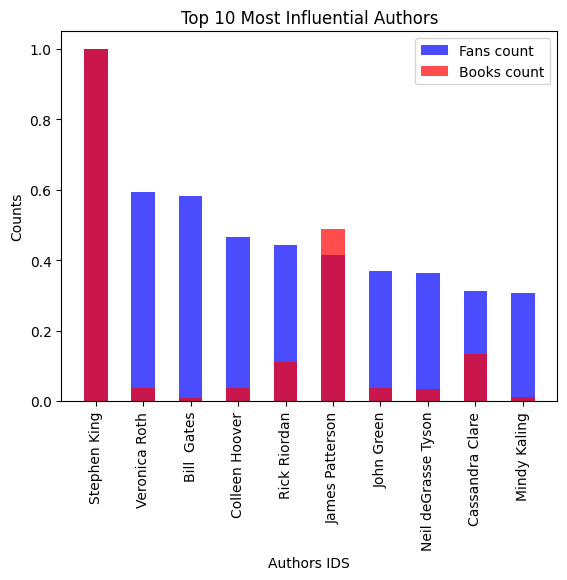

In [ ]:
authors = pd.read_json("/content/drive/MyDrive/data/lighter_authors.json", lines=True)

authors.dropna(axis=1)
authors = authors[['name','id','fans_count','book_ids',]]
authors['books_n'] = authors['book_ids'].apply(len)

top_auth = authors.sort_values(by=['fans_count','books_n'], ascending=[False,False]).iloc[:10]
# normalize to show a proper plot
top_auth['fans_count_norm'] = top_auth['fans_count'] / top_auth['fans_count'].max()
top_auth['books_n_norm'] = top_auth['books_n'] / top_auth['books_n'].max()

plt.bar(top_auth['name'],top_auth['fans_count_norm'], label='Fans count', color='blue', alpha=0.7,width=0.5)
plt.bar(top_auth['name'],top_auth['books_n_norm'], label='Books count', color='red', alpha=0.7,width=0.5)
plt.xlabel('Authors IDS')
plt.ylabel('Counts')
plt.title('Top 10 Most Influential Authors')
plt.xticks(rotation=90)
plt.legend()
plt.show()


The most influential author is:

In [ ]:
first_top_auth = top_auth.iloc[0]
print(first_top_auth)

name                                               Stephen King
id                                                         3389
fans_count                                                  1.0
book_ids      [11588, 830502, 149267, 10614, 10592, 43615, 1...
books_n                                                     1.0
Name: 1017, dtype: object


Now I'm gonna create the cleaned Data Frame with all the books written by these authors, so it allows me to prepare data for the next questions.

In [ ]:
id_list = top_auth['id'].tolist()

cleaned_book = pd.DataFrame()

with pd.read_json("/content/drive/MyDrive/data/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
      for chunk in jreader:
          chunk = chunk[['author_id','series_id','series_name','format']]
          filt = chunk[(chunk['series_id'] != '') & (chunk['series_id'] != '') & (chunk['series_name'] != '') & (chunk['format'] != '')]
          filt = filt[filt['author_id'].isin(id_list)]

          filt.loc[filt['format'].str.contains('paperback', case=False, na=False), 'format'] = 'paperback'
          filt.loc[filt['format'].str.contains('mp3', case=False, na=False), 'format'] = 'mp3'
          filt.loc[filt['format'].str.contains('audio', case=False, na=False), 'format'] = 'audio'
          filt.loc[filt['format'].str.contains('electronic book', case=False, na=False), 'format'] = 'ebook'
          filt.loc[filt['format'].str.contains('ebook', case=False, na=False), 'format'] = 'ebook'
          filt.loc[filt['format'].str.contains('hard cover', case=False, na=False), 'format'] = 'hardcover'

          cleaned_book = pd.concat([cleaned_book,filt],axis=0).reset_index(drop=True)

## Have they published any series of books? If any, extract the longest series name among these authors.

In [ ]:
author_series = cleaned_book.groupby(['author_id','series_id','series_name']).size().reset_index(name='count')

longest_series_idx = author_series['count'].idxmax()
longest_series = author_series.loc[longest_series_idx]['series_name']

print(longest_series)

Alex Cross


## How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.

With 'format_n' we build a new dataset made of the 'author_id', the 'format' he's been published in and the 'count_per_format' that's the number of time that a certain author has been published in a certain format.

Instead, 'f_count' contains, for each format, how many publications there have been overall in that format.

In the end I split 'f_count' in two dataset to have a better and cleaner plot.

In [ ]:
# for each author, how many publications for each format.
format_n = cleaned_book.groupby(['author_id','format']).size().reset_index(name='count_per_format')
# how many publication overall per format
f_count = format_n.groupby(['format'])['count_per_format'].sum().reset_index(name='count')

f_count_1 = f_count[f_count['count'] > 50]
f_count_2 = f_count[f_count['count'] <= 50]

Now I'm gonna plot the most used formats, I mean the one with 'count' > 50.

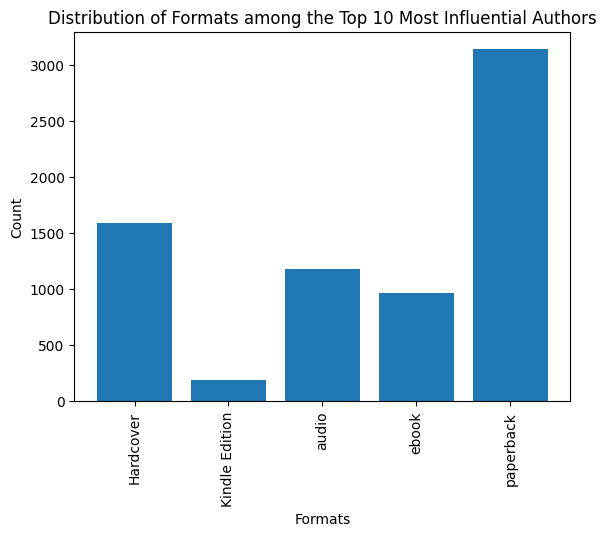

In [ ]:
plt.bar(f_count_1['format'],f_count_1['count'])
plt.xlabel('Formats')
plt.ylabel('Count')
plt.title('Distribution of Formats among the Top 10 Most Influential Authors')
plt.xticks(rotation=90)
plt.show()

How we can see, the most published formats are paperback and hardcover (these are paper-made editions), followed by 'ebook' and 'audio' format (cd, mp3 ecc..)

And now I'll plot the less used ones.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21109 (\N{CJK UNIFIED IDEOGRAPH-5275}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

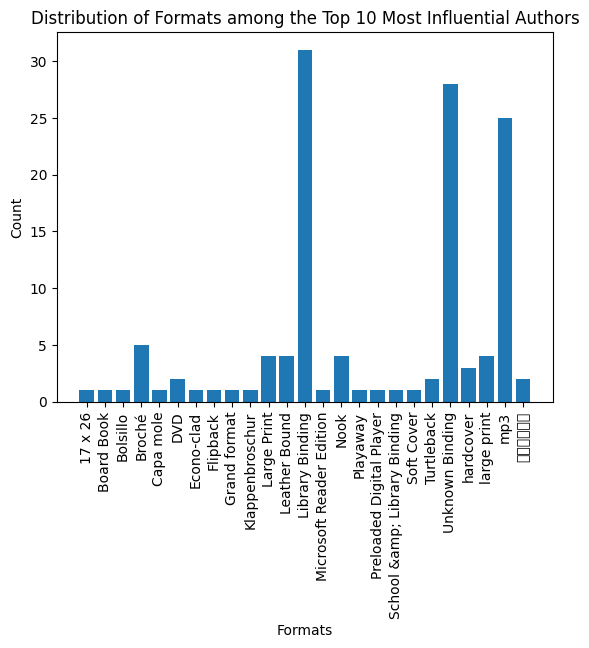

In [ ]:
plt.bar(f_count_2['format'],f_count_2['count'])
plt.xlabel('Formats')
plt.ylabel('Count')
plt.title('Distribution of Formats among the Top 10 Most Influential Authors')
plt.xticks(rotation=90)
plt.show()

How many of these authors have been published in different formats?

In [ ]:
f_count_auth = format_n.groupby(['author_id']).size().reset_index(name='count_per_auth')

print(f_count_auth[f_count_auth['count_per_auth'] > 1].shape[0])

8


##Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias”.

To answer this question I will use the "authors" dataset cleaned, so that in the 'gender' column there will be 3 possible values: 'male', 'female' and 'other'. This will semplify our analysis.


In [ ]:
# run the previous cell containing the cleaning of the dataset
authors = authors[['gender','average_rating','fans_count']]

First I'm gonna display the total number of authors per gender.

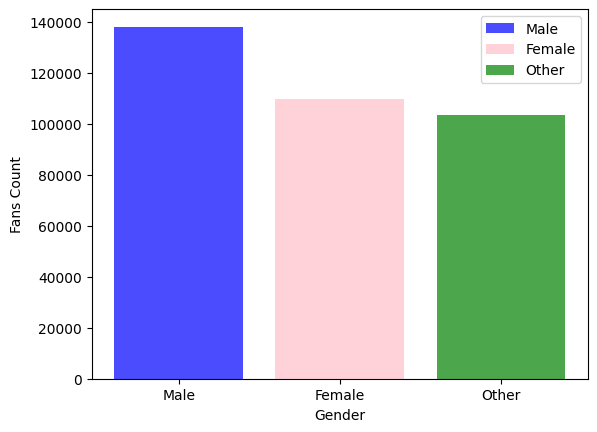

In [ ]:
grouped = authors.groupby('gender')['fans_count'].count().reset_index(name='count')

plt.bar('Male',grouped[grouped['gender'] == 'male']['count'],label='Male',alpha=0.7,color='blue')
plt.bar('Female',grouped[grouped['gender'] == 'female']['count'],label='Female',alpha=0.7,color='pink')
plt.bar('Other',grouped[grouped['gender'] == 'other']['count'],label='Other',alpha=0.7,color='green')
plt.xlabel('Gender')
plt.ylabel('Fans Count')
plt.legend()
plt.show()

So as we can see in the bar plot in the dataset there are more male authors than female ones or 'other' gender

In [ ]:
print("Males' author rate is",  "{:.2%}".format(len(authors[authors['gender']=='male'])/len(authors)))
print("Female' author rate is", "{:.2%}".format(len(authors[authors['gender']=='female'])/len(authors)))
print("Others' author rate is","{:.2%}".format(count/len(authors)))

#If we know little of our society we could highly expect men to be in higher number than
#femal. Not too predictable maybe the 'others-rate'. By latest survey only 3% of the population identifies
#as non-binary. But some answers probably just wanted to undermine the concept of
#gender underlying the question

Males' author rate is 39.28%
Female' author rate is 31.24%
Others' author rate is 29.48%


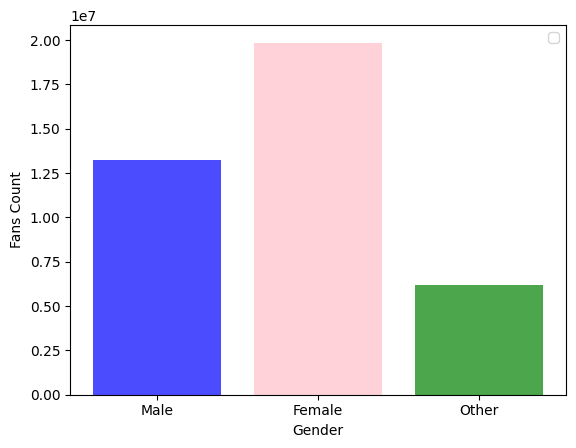

In [ ]:
grouped = authors.groupby('gender')['fans_count'].sum().reset_index(name='tot')

male = grouped[grouped['gender'] == 'male']
female = grouped[grouped['gender'] == 'female']
other = grouped[grouped['gender'] == 'other']
plt.bar('Male',male['tot'],alpha=0.7,color='blue')
plt.bar('Female',female['tot'],alpha=0.7,color='pink')
plt.bar('Other',other['tot'],alpha=0.7,color='green')
plt.xlabel('Gender')
plt.ylabel('Fans Count')
plt.legend()
plt.show()

But it's interesting that, despite there are more male authors, female authors have more fans than male authors, and way more fans than other gender authors.

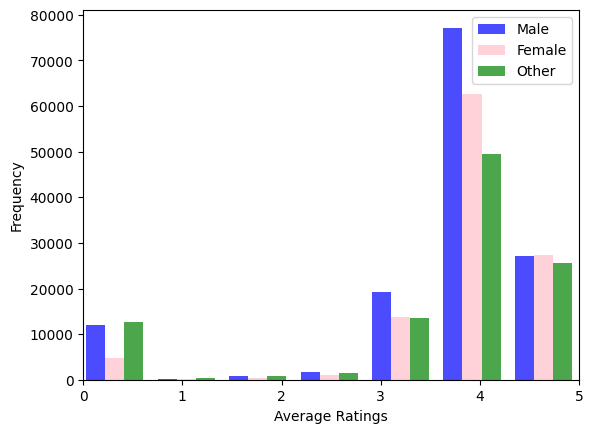

In [ ]:
authors = authors[['gender','average_rating','fans_count']]

grouped = authors.groupby('gender')['average_rating']
plt.hist([grouped.get_group('male'), grouped.get_group('female'), grouped.get_group('other')],bins=50, alpha=0.7, label=['Male', 'Female', 'Other'], color=['blue','pink','green'])
plt.xlabel('Average Ratings')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,5)
plt.show()

Regards the distribution of the average ratings we can not identify a different behaviour for our variable inbetween gender classes: there is an high concentration around the rating equals to 4 and a lower concentration around the ratings 1 and 2.
By the comparision of the different genders we can see that, despite there are more male authors, female and other authors receive more ratings equal to five than male ones. Furthermore, the female authors are less likely to receive a ratings equals to zero, while the other gender authors, despite are the less numerous in the dataset, tend to receive an higher number of ratings equal to zero.

This is the average rating for each gender

   gender   avg
0  female  3.84
1    male  3.61
2   other  3.51


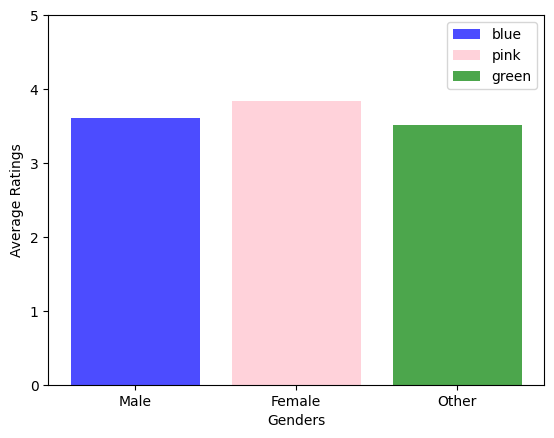

In [ ]:
grouped = authors.groupby('gender')['average_rating'].mean().round(2).reset_index(name='avg')
print(grouped)

male = grouped[grouped['gender'] == 'male']
female = grouped[grouped['gender'] == 'female']
other = grouped[grouped['gender'] == 'other']
plt.bar('Male',male['avg'],label='blue',alpha=0.7,color='blue')
plt.bar('Female',female['avg'],label='pink',alpha=0.7,color='pink')
plt.bar('Other',other['avg'],label='green',alpha=0.7,color='green')

plt.xlabel('Genders')
plt.ylabel('Average Ratings')
plt.legend()
plt.ylim(0,5)
plt.show()

In fact, as shown in the last bar plot, female authors receive on average higher ratings than male or other gender's authors

#RQ6


##Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?



In [ ]:
#Importing the dataset in order to extract the top ten authors
authors = pd.read_json("/content/drive/MyDrive/Data2/lighter_authors.json", lines=True)

In [ ]:
#consider the top 10 authors concerning the number of fans again
#This steps are uncessary if you already run R5. Just as you want be able to run all we repeat the main step to get R6 results
authors = authors[['name','fans_count','book_ids']]
authors['books_n'] = authors['book_ids'].apply(len)

top_auth = authors.sort_values(by=['fans_count','books_n'], ascending=[False,False]).iloc[:10]
top_authors = top_auth['name'].tolist()

Many hypothesis need to be made as the question was not providing any more secific requests. Most important one are reported here. For same more details in the implementation you can read the comment in the code

First we decide to consider average time gap by taking into account only years of *original_publication_date* variable, extracting them when needed. As this information is available for most of the date. This also makes average more robust as it is performed on more data.

###We decide to compute the average of time gap for each author for a **series_book** as average of the time gap by first doing the average of each series for each serie of an author and then by computing the average for each author. Instead for non-series book we evalute the global average as average of non-series books time gap for each authors


By the following function, we return a tuple which contains: (average for series-books, average for non-series-books)

We assume that time-gap for a series book is shorter then non series book time-gap. There are some good reason to think so. First due to some editorial reasons. Maybe the authors signs some kind of contract for sequels to come out or have requests just after the book is successfull. This may lead the author to have time and money to spend for a series of book and not deidcate to other projects. Secondly he maybe also tought him-herself of some story while writing it and it is unlikly to stop.



In [ ]:
# Specify the full path to the filename
module_path = '/content/drive/MyDrive/Data2/timegap.py'

# Import the module using importlib
import importlib.util
spec = importlib.util.spec_from_file_location("timegap", module_path)
timegap = importlib.util.module_from_spec(spec)
spec.loader.exec_module(timegap)



In [ ]:
# We know that a year is a sequence of 4 consecutive digits made at the beginning of original_publication_date
pattern = '^\d{4}'


# Inizialitation of a dictionary to save list of books and dates
author_dict = defaultdict(lambda: [])

book_series = pd.DataFrame()
with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        chunk = chunk[chunk['author_name'].isin(top_authors)]
       # print(chunk[chunk['author_name']=='Stephen King'])
        chunk = chunk[['author_name','original_publication_date','series_id']]
       # print(chunk)
        for index, row in chunk.iterrows():
            series_id = row['series_id']
            aut = row['author_name']
            publication_date = row['original_publication_date']
          #  print('pub',publication_date)
            if bool(re.match(pattern, publication_date)):
                publication_date = int(publication_date[:4])
                author_dict[aut,series_id].append(publication_date)
    #    break

#Using the function described in the file
partial = timegap.transf(author_dict)
p = timegap.avgaut(partial)
print(p)



(0.154, 0.327)


We return a tuple for (series book, non-series book) where we evaluated the average gap time as $$\dfrac{\text{range time}}{\text{number of book published in that range time}} $$

We can interpreter it as the **average time to write a book within one year time**

In our case for a Series bokos in takes on average almost 2 month ($0.154\cdot12$) to publish a book and almost 4 month ($0.327\cdot12$) to publish a book which is in a non-series book. We see that this seem quite a short time but it's actually compatible to the dataset. As we will deepin in the next question this ten top_authors were really prolific. Only Stephen King publlished like 6'000 books according to the selection made in the dataset. Know maybe two books in a months seems more appropriate.

The relation between time gap for series book and for non-series book is what was expected from our initial idea.

In [ ]:
#Store the result of the function in a dataset to have a better visualization

avg_Series=p[0]*12
avg_NOSeries=p[1]*12

data = {"category": ["Series", "Non-series"],
    "average time (months)": [round(p[0]* 12),round(p[1]*12)]
}

df = pd.DataFrame(data, columns = ['average time (months)'], index=data["category"])

# Print the DataFrame (in a Jupyter Notebook cell)
df


,average time (months)
Series,2
Non-series,4


##For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?

In [ ]:
print(top_authors)

['Stephen King', 'Veronica Roth', 'Bill  Gates', 'Colleen Hoover', 'Rick Riordan', 'James Patterson', 'John Green', 'Neil deGrasse Tyson', 'Cassandra Clare', 'Mindy Kaling']


In [ ]:
# Defining a function which, given a list of years for each author, computes how many books are published up to a certain year (cumulative frequency)
#and stores it in a dictory
def findcumulative(years):
    cumulative_frequency = defaultdict()
    cumulative_count = 0
    years.sort()
    # Iterate through the sorted list of years
    for year in years:
        cumulative_count += 1
        #to avoid multiple assignment you can store a local variable and update only when a year changes
        cumulative_frequency[year] = cumulative_count
    if len(years)>1:
        local = years[0]
        for i in range(years[0]+1,years[-1]):
            if i not in years:
                cumulative_frequency[i] = cumulative_frequency[local]
            else:
              local = i

    return cumulative_frequency

In [ ]:
# Create a dictionary which stores a list of years for each author
bookperyear_author  = defaultdict(lambda: [])

with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        # Consider the top 10 authors
        chunk = chunk[chunk['author_name'].isin(top_authors)]
        chunk = chunk[['author_name','publication_date']]
        for index, row in chunk.iterrows():
            auth = row['author_name']
            pubdate = row['publication_date']
            #filter only for year
            if len(pubdate)>=4 and pubdate[0:4].isnumeric():
                pubdate = int(pubdate[:4])
                #saving years to the dictionary
                bookperyear_author[auth].append(pubdate)

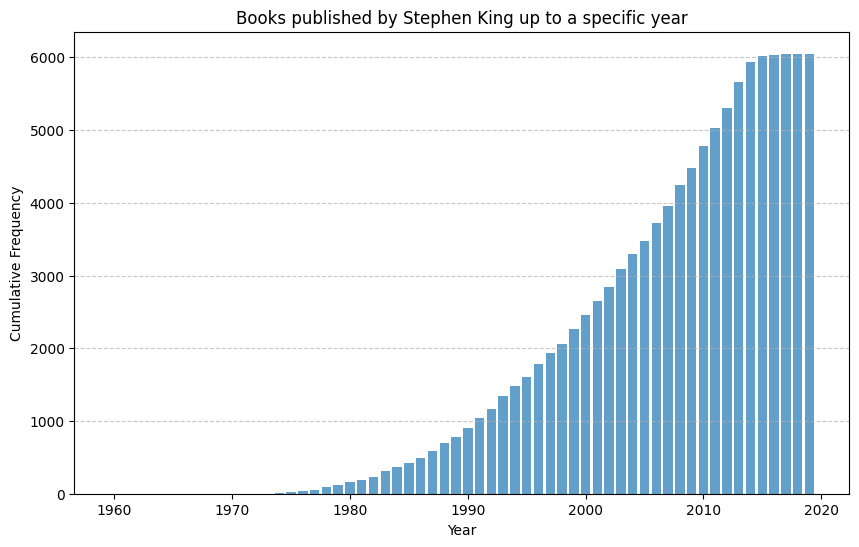

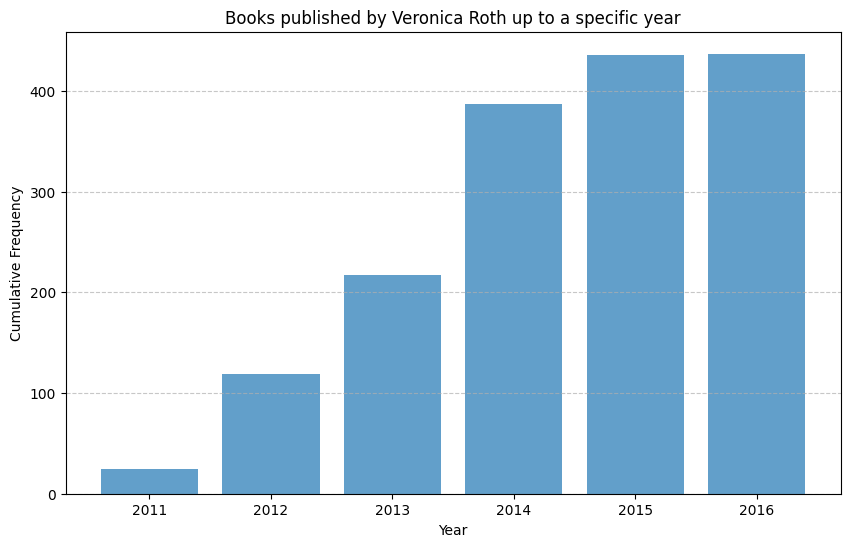

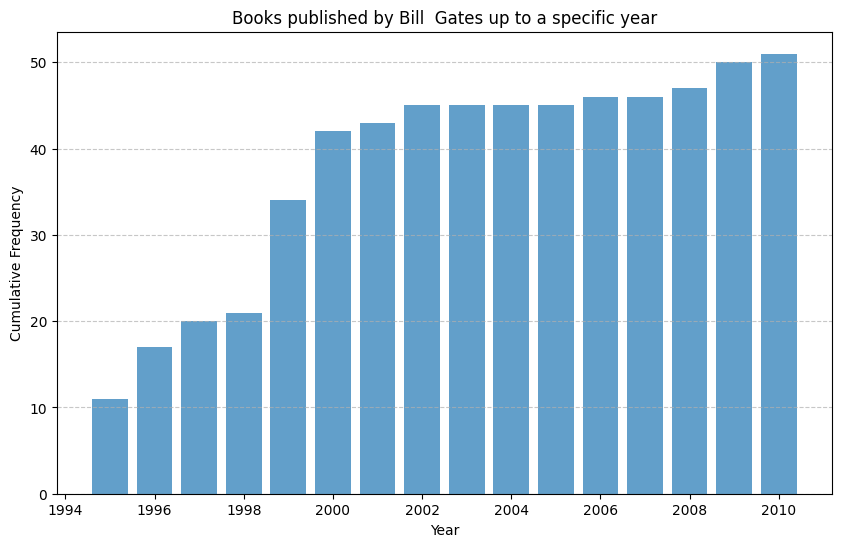

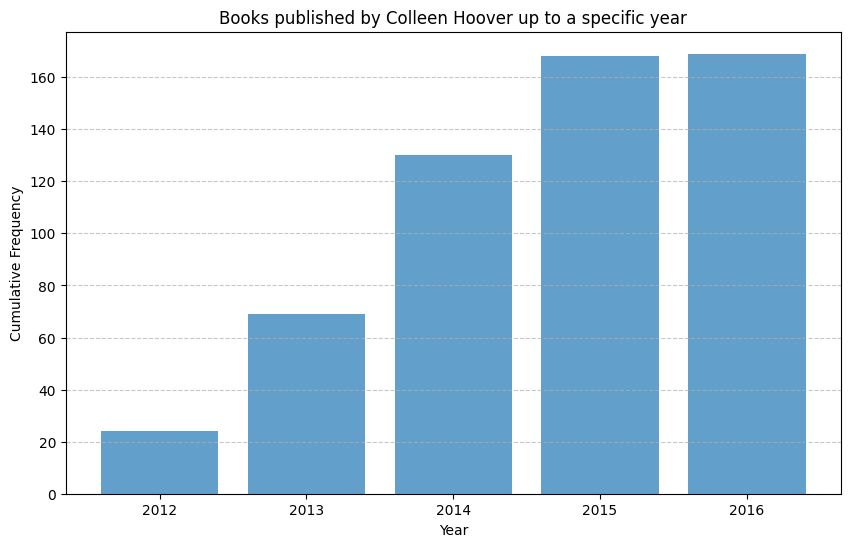

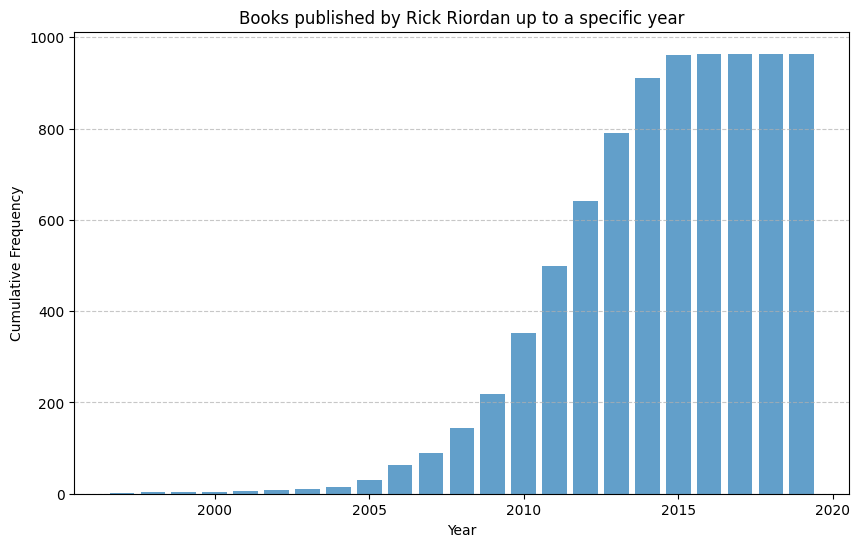

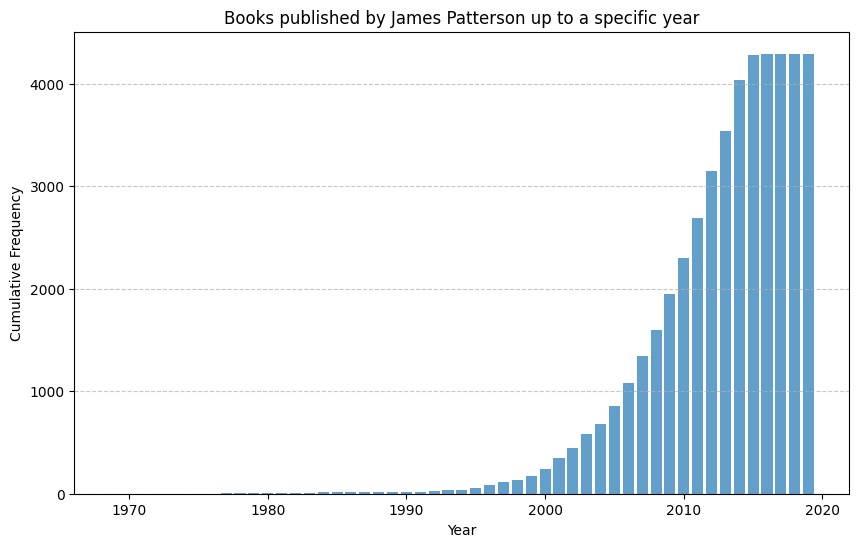

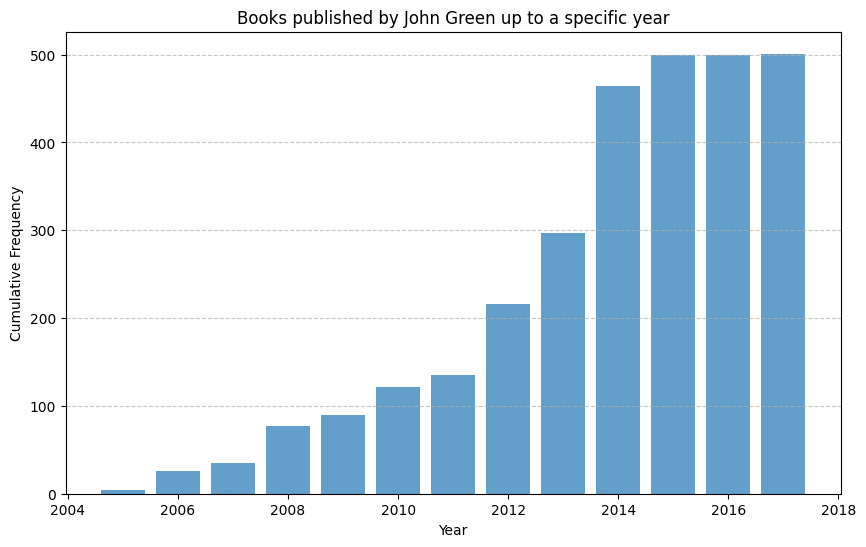

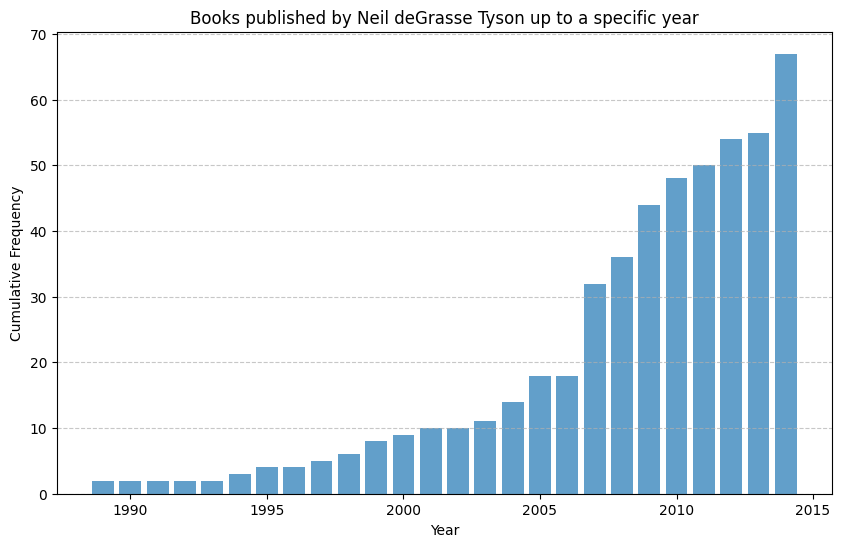

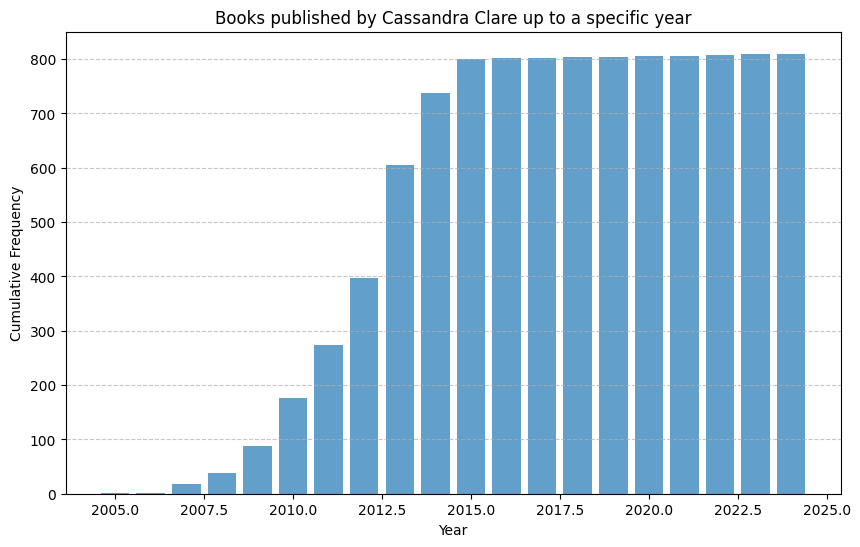

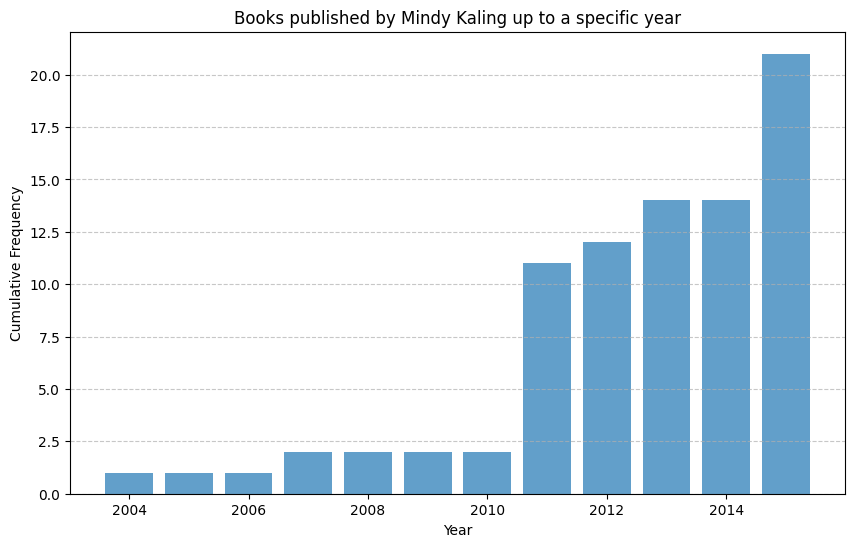

In [ ]:
for author in top_authors:
    # Retrieving all years of pubblication for an author through the dictionary created
    years = list(findcumulative(bookperyear_author[author]).keys())
    # Retrieving al cumulated frequency of books for an author up to that years through the dictionary
    frequencies = list(findcumulative(bookperyear_author[author]).values())

#print(bookperyear_author)
   # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(years, frequencies, align='center', alpha=0.7)
    plt.xlabel('Year')
    plt.ylabel('Cumulative Frequency')
    #    plt.title(f'Books published by {author} up to a specific year')
    plt.title(f'Books published by {author} up to a specific year')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

We compare the books published altogether for all authors with a joint plot.
We see authors are allmost contemporary with each others.


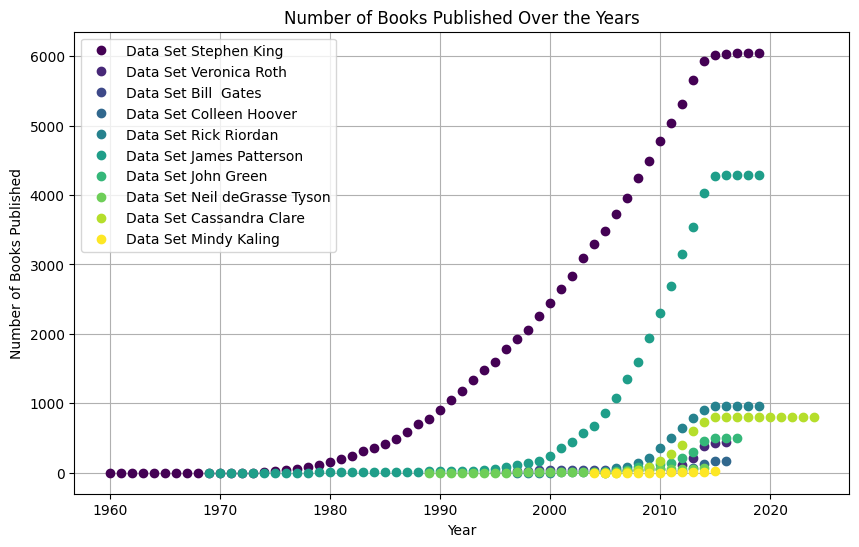

In [ ]:

# Create a plot
plt.figure(figsize=(10, 6))

# Define a list of distinct colors for the lines
colors = plt.cm.viridis(np.linspace(0, 1, len(top_authors)))

for i, author in enumerate(top_authors):
    # Retrieving all years of pubblication for an author through the dictionary created
    years = list(findcumulative(bookperyear_author[author]).keys())
    # Retrieving al cumulated frequency of books for an author up to that years through the dictionary
    frequencies = list(findcumulative(bookperyear_author[author]).values())


    plt.plot(years, frequencies , marker='o', label=f'Data Set {top_authors[i]}', color=colors[i],  linestyle='')

# Add labels and legend
plt.title('Number of Books Published Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Books Published')
plt.legend()

plt.grid(True)  # Add grid lines if desired

plt.show()


We are plotting the ECDF (Empirical Cumulative Distribution Function) for the 'years' variable, representing the distribution of published books over time. Each year corresponds to a published book.

For example, Stephen King had approximately half of his production (0.5 percentile on the y-axis) around the year 1990. We can perform a similar analysis for other authors.

To identify periods of particularly high production rates, we should examine for significant jumps in each author's distribution. For some authors, their distribution appears to steadily increase without clear, distinct jumps.

In contrast, Bill Gates, John Green, Mindy Kaling, and Colleen Hoover appear to have been more productive soon after the year 2010. This increase in productivity could be related to the end of the American economic crisis, as all these authors are American.

It seems that authors, in general, with the exception of Stephen King, tend to be quite productive within a 20-year period time. This could be attributed to writing deadlines and the need to maintain a high level of productivity.

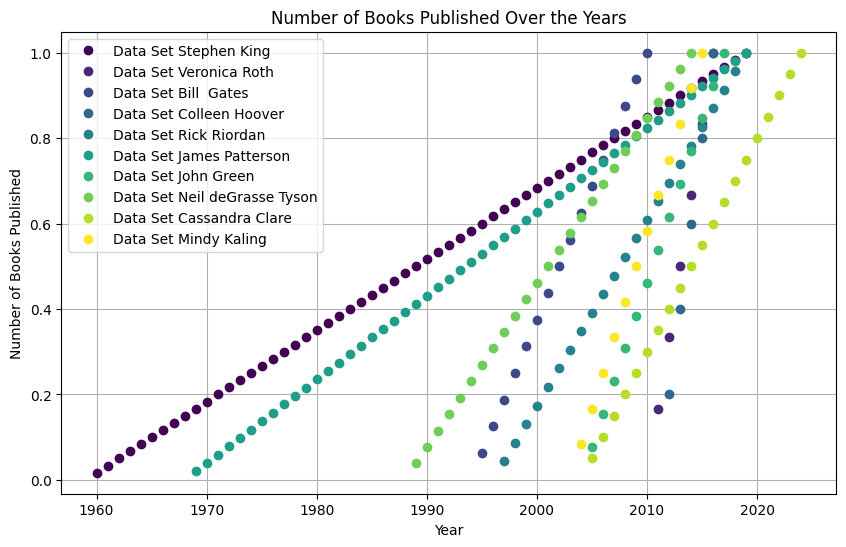

In [ ]:

# Create a plot
plt.figure(figsize=(10, 6))

# Define a list of distinct colors for the lines
colors = plt.cm.viridis(np.linspace(0, 1, len(top_authors)))

for i, author in enumerate(top_authors):
    # Retrieving all years of pubblication for an author through the dictionary created
    years = list(findcumulative(bookperyear_author[author]).keys())
    # Retrieving al cumulated frequency of books for an author up to that years through the dictionary
    frequencies = list(findcumulative(bookperyear_author[author]).values())


    ecdf = np.arange(1, len(frequencies) + 1) / len(frequencies)
    years.sort()
    plt.plot(years, ecdf , marker='o', label=f'Data Set {top_authors[i]}', color=colors[i],  linestyle='')

# Add labels and legend
plt.title('Number of Books Published Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Books Published')
plt.legend()

plt.grid(True)  # Add grid lines if desired

plt.show()


#RQ7

###Estimate the probability that a book has over 30% of the ratings above 4.

1. Compute the probability of having rate 5 as:
$$\dfrac{\text{# 5}}{\text{total ratings}}$$
2. Having the rates for each book we compute the probability that a book has has over 30% of ratings above 4 as average of the probability (rate) for each book

In [ ]:
# Defining a regular expression in order to capture 2 groups for 5 and tot respectively
pat1 = r'(\d+):(\d+)|total:(\d+)'

# Creating a list to save average rates
data=[]
with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        chunk = chunk['rating_dist']
        for value in chunk:
            matches = re.findall(pat1, value)
            for match in matches:
                if match[0]=='5':
                    five= int(match[1])
                    #REINDENT?
                tot = match[2]
            # Not considering the books with no total rate count
            if tot!='0':
                # Appending the probability of get rate equal to 5
                data.append(five/int(tot))
   #     break
filter = [value for value in data if value > 0.30]
# Weighted probability considering each book as indipendent from the other which is not so realistic
print(round(sum(filter)/len(data),2))


0.25


###Estimate the probability that an author publishes a new book within two years from its last work.


We describe how we compute the probability of the event E = {an author publishes a new book within two years from its last work}. We first sort the list of years in which an author has published a book. We then compute P(E) as:

$$P(E) = \dfrac{\text{# of books which temporal distance to the last published book is less than 2 years for an author}}{\text{total book published by an auhtor}}$$

We than took an average of all the probability for each author.

In [ ]:
origdate = pd.DataFrame()
compute_avglist = []

def in2year_perauthor(origdate):
    # List which contains, for each author, the probability that he/she publishes within two years.
    # Each probability is computed as follows:
    # P_i = #(number of couples of subsequent published book within 2 years)/#(published books)
    list_prob = []
    for author, auth_data in origdate.groupby('author'):
        # Filter books for each author with a time gap less than or equal to 2 years
        author_filtered_data = auth_data[auth_data['time_gap'] <= pd.Timedelta(days=730)]
        # Calculate the total number of books published within 2 years
        total_books_in_2_years = len(author_filtered_data)
        # Calculate the total number of books for this author
        total_books_published = len(auth_data)
        # Calculate the probability
        # At least two books are needed for a time gap
        if total_books_published > 1:
            probability = total_books_in_2_years / (total_books_published - 1)
            list_prob.append(probability)
    # Rounding the probability
    avg = np.mean(list_prob)
    avg=round(avg,3)
    return avg

# Read columns (author, date of publication) of all database chunk by chunk
with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize= CHUNK_SIZE) as jreader:
    for chunk in jreader:
        origdate['author'] = chunk['author_name']
        origdate['original_publication_date']  = pd.to_datetime(chunk['original_publication_date'],errors='coerce')
        # sort the DataFrame by author and publication date
        break
    # Order rows by grouping for author and, within each group by the date
    origdate.sort_values(by=['author', 'original_publication_date'], inplace=True)
    # Calculate time gaps between two consecutive datetime of a book of the same authors
    origdate['time_gap'] = origdate.groupby('author')['original_publication_date'].diff()

in2year_perauthor(origdate)


0.574

###In the file list.json, you will find a peculiar list named "The Worst Books of All Time." Estimate the probability of a book being included in this list, knowing it has more than 700 pages.

Have a look to the new dataset in order to indivuate the requested list

In [ ]:
with pd.read_json("/content/drive/MyDrive/Data2/list.json", lines=True, chunksize=20) as jreader:
    for chunk in jreader:
        #checking for this list names
        chunk.info()
        break

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                20 non-null     int64 
 1   title             20 non-null     object
 2   description       20 non-null     object
 3   description_html  20 non-null     object
 4   num_pages         20 non-null     int64 
 5   num_books         20 non-null     int64 
 6   num_voters        20 non-null     int64 
 7   created_date      20 non-null     object
 8   tags              20 non-null     object
 9   num_likes         20 non-null     int64 
 10  created_by        20 non-null     object
 11  num_comments      20 non-null     int64 
 12  books             20 non-null     object
dtypes: int64(6), object(7)
memory usage: 2.2+ KB


Import the list

In [ ]:
with pd.read_json("/content/drive/MyDrive/Data2/list.json", lines=True, chunksize=10) as jreader:
    for chunk in jreader:
        print(chunk.loc[0])
        break

id                                                                  2
title                                     The Worst Books of All Time
description         What do you think are the worst books ever wri...
description_html    \n      What do you think are the worst books ...
num_pages                                                          74
num_books                                                        7395
num_voters                                                      18260
created_date                                           May 20th, 2008
tags                [abominable, abomination, awful, bad, disgusti...
num_likes                                                         175
created_by                    {'name': 'Michael Economy', 'id': '73'}
num_comments                                                     2570
books               [{'book_id': '41865', 'title': 'Twilight', 'au...
Name: 0, dtype: object


We need to evalute:

$$P(\text{a book is the worst book list}|\text{has more than 700 pages}) = \dfrac{ P(\text{a book is the worst book list} \cap\text{has more than 700 pages})}{P(\text{has more than 700 pages})}$$

We compute the
$$P(\text{a book is the worst book list} \cap\text{has more than 700 pages}) = \dfrac{\text{# book in the worst list with more than 700 pages}}{\text{# books}}$$
 and
 $$P(\text{has more than 700 pages}) = \dfrac{\text{# book has more than 700 pages}}{\text{# books}}$$

In [ ]:
worst =[]

# Import the dataset
with pd.read_json("/content/drive/MyDrive/Data2/list.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        for index, row in chunk.iterrows():
            if 'books' in row:
                # Selecting the list of dictionaries where there are all information about the worst book
                worstlist = row['books']
                # For each dictionary in the list
                for i in range(1, len(worstlist)):
                    # Collecting book_ids for the list of books contained in "The Worst Books of All Time" through the keyword 'book_id'
                    worst.append(worstlist[i]['book_id'])

#We print just some element of the list
print(worst[1:10])


['49041', '428263', '10818853', '6263078', '6076107', '3090465', '564449', '968', '4013201']


In [ ]:
# Convert id in the list to integers
worst = [int(i) for i in worst]
# Counter for books with more than 700 pages
count_pages700 = 0
# Counter for the intersection of books with more than 700 pages and in the worst books' list
count_intersection = 0

with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk1 in jreader:
        chunk = chunk1[['id', 'num_pages']]
        # Transforming the values 'num_pages' into integers
        mask = chunk['num_pages'].apply(lambda x: isinstance(x, (int)))
        chunk = chunk[mask]  # Apply the boolean mask to the DataFrame
        # Counting how many books have more than 700 pages within the current chunk
        count_pages700 += (chunk['num_pages'] > 700).sum()

        # Selecting worst books
        intersection_chunk = chunk[chunk['id'].isin(worst)]
        # Counting how many books have more than 700 pages and are in the worst book lists
        count_intersection += (intersection_chunk['num_pages'] > 700).sum()
        #to perform in general /chunk.count()
        # here is avoid to get a better performance
      #  break

Pxy = count_intersection/7027431
Py = count_pages700/7027431
#print('joint',Pxy)
#print('Py',Py)
probability = round(Pxy / Py,3)

print('Probability:', probability)


Probability: 0.123


### Are the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent? Explain how you have obtained your answer.

Being X the event X = {Being Included in The Worst Books of All Time list} and Y the event Y = {’Having more than 700 pages},these events are indipendent if the following statement is satysfied:
$$ P(X \cap Y) = P(X) \cdot P(Y)$$
or equally (P(Y)>0):
$$ P(X |Y) = P(X)$$

Additionally, we already computed $P(X \cap Y)$ and P(Y) to compute the conditional probability. We could indeed check through both expression as soon as we compute $P(X)$ in the next cell code.

In [ ]:
# Computing Px
Px = intersection_chunk['num_pages'].count()/7027431

# Check indipendence FORMULA1
print('probability of the intesection', round(Pxy,3))
print('product of probabilities', round(Px*Py,6))
print(Pxy==(Px*Py))
print('---------------------------------------')
# Check independence FORMULA2
print('conditional probability', round(probability,3))
print('Px', round(Px,6))
print(probability==Px)

probability of the intesection 0.002
product of probabilities 1e-06
False
---------------------------------------
conditional probability 0.123
Px 4.7e-05
False


The two event are dipendent. The probability of a book to be in the worst books list is not the same if the book has more or less than 700 pages. If a book has more than 700 pages the probability of the book to be in the worst book increases (from 0.00047 to 0.123). This is unlogic but may happens within a specific datadaset as for instance this one.

#RQ8

##Can you demonstrate that readers usually rate the longest books as the worst?

Let's start searching for some kind of correlation between the two variable attempting some different approches

In [ ]:
chunkH0 = pd.DataFrame()
chunkH1 = pd.DataFrame()

with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        chunk = chunk[['average_rating','num_pages']]
        chunk = chunk[(chunk['num_pages'] != '') & (chunk['num_pages'] != 0)]
        chunk = chunk[chunk['average_rating'] >0]
        chunkH0 = pd.concat([chunk[chunk['num_pages'] > 700]['average_rating']] ,axis =0)
        chunkH1 = pd.concat([chunk[chunk['num_pages'] <= 700]['average_rating']],axis =0)
        #break


# We compute the average (parameter of our empiric distribution) for each group
print('The average rating score number having a little number of pages',round(chunkH0.mean(),3))
print('The average rating score number having a high number of pages',round(chunkH1.mean(),3))


The average rating score number having a little number of pages 4.228
The average rating score number having a high number of pages 3.901


This are the average number of pages of books having a low rating score and high score respectively.

Books with higher number of pages have in average a rating score which is circa 0.3 points over rating's score of shorter books. We see that we will probably reject the test.

In [ ]:
# We compute the sd for each group
print('The average rating score number having a little number of pages',round(chunkH0.std(),3))
print('The average rating score number having a high number of pages',round(chunkH1.std(),3))

The average rating score number having a little number of pages 0.348
The average rating score number having a high number of pages 0.507


A low sd in the first group suggests that the ratings for books with a little number of pages are relatively consistent, meaning that most readers tend to rate them similarly.
A high standard deviation for longer books suggests that readers' ratings for longer books have a wider range. An higher sd in one group can imply a varied can readers' opinions be.

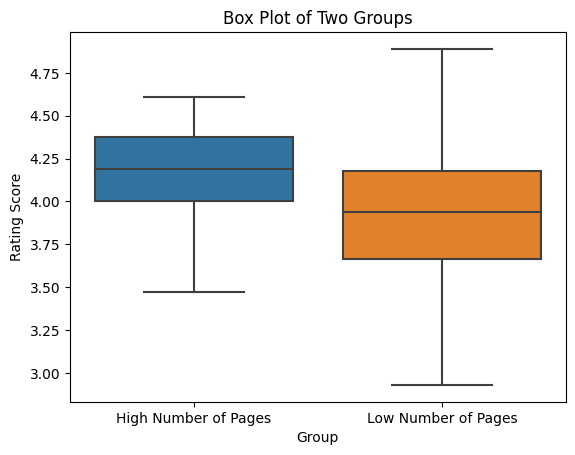

In [ ]:
data = pd.DataFrame({'value': pd.concat([chunkH0, chunkH1]),
                     'group': ['High Number of Pages'] * len(chunkH0) + ['Low Number of Pages'] * len(chunkH1)})

# Create box plots for the two groups
sns.boxplot(x='group', y='value', data=data,  showfliers=False)
plt.xlabel('Group')
plt.ylabel('Rating Score')
plt.title('Box Plot of Two Groups')
plt.show()

We visualize a scatterplot in order to see if there's a linear relationship between the two variables.

In [ ]:
X = pd.DataFrame()

with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        chunk = chunk[['average_rating','num_pages']]
        chunk = chunk[(chunk['num_pages'] != '') & (chunk['num_pages'] != 0)]
        chunk = chunk[chunk['average_rating'] >0]
        X = pd.concat([chunk],axis=0)
        #break


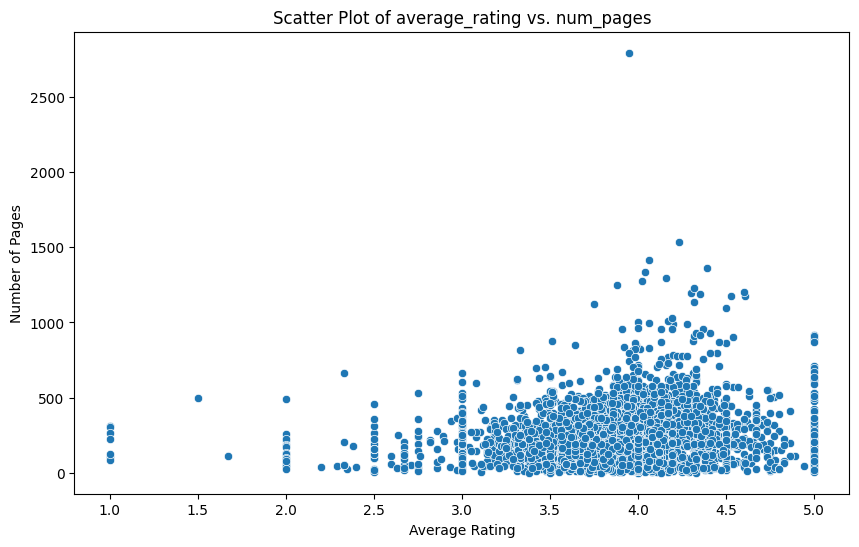

In [ ]:
X['average_rating'] = pd.to_numeric(X['average_rating'])
X['num_pages'] = pd.to_numeric(X['num_pages'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='average_rating', y='num_pages')
plt.title('Scatter Plot of average_rating vs. num_pages')
plt.xlabel('Average Rating')
plt.ylabel('Number of Pages')

plt.show()

Doesn't look like linear. We could resemble a linear pattern in the more rarefied zones. So probably we can check just by computing correlation.

In [ ]:
# Convert 'num_pages' to numeric
X['num_pages'] = pd.to_numeric(X['num_pages'], errors='coerce')

# Compute the correlation matrix
correlation_matrix = pd.concat([X['average_rating'],X['num_pages']],axis=1).corr()

# Get the correlation coefficient between the two variables
correlation_coefficient = correlation_matrix.loc['average_rating','num_pages']

print("Correlation Coefficient:", round(correlation_coefficient,3))


Correlation Coefficient: 0.129


Indeed there is no significant linear correlation.

To deepen this question, we can compare the means of two groups chosen appropriately using a t-test.

**We want to test if there is a significant difference in the average ratings between books with a high number of pages and books with a low number of pages.** Therefore, I set my null hypothesis (H0) as the average rating of books is not significantly affected by the number of pages. Readers do not usually rate the longest books as the worst (no effect), while my alternative hypothesis (H1) is that there is a significant difference. (The average rating of books is significantly affected by the number of pages).

In particular, we have decided to compare the mean of the variable 'num_pages' for two distinct groups. The first group consists of books with a high number of pages (> 700), while the second group comprises books with a lower number of pages (<= 700).


<ipython-input-25-926a92c81bf4>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(chunkH0, label='pages > 700', shade=True)
<ipython-input-25-926a92c81bf4>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(chunkH1, label='pages <= 700', shade=True)


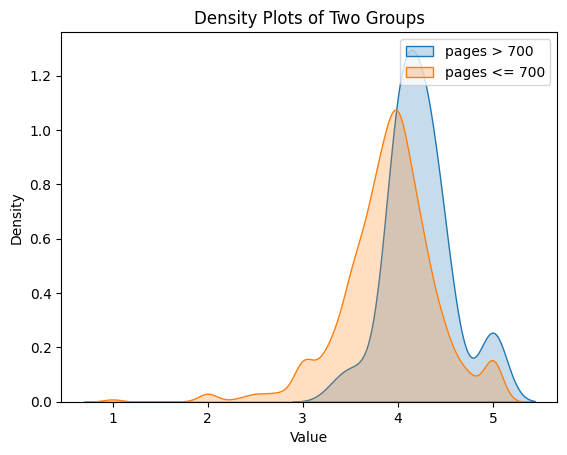

In [ ]:
# Create density plots for the two groups
sns.kdeplot(chunkH0, label='pages > 700', shade=True)
sns.kdeplot(chunkH1, label='pages <= 700', shade=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.title('Density Plots of Two Groups')
plt.show()

In [ ]:
# We choose not a strict alpha as it is a social dataframe, we could test for multiples alpha.
alpha=0.10

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(chunkH0, chunkH1)

# Check the p-value against your chosen alpha
if p_value < alpha:
    print("Reject the null hypothesis H0")
else:
    print("Fail to reject the null hypothesis H1")

# Print the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)


Reject the null hypothesis H0
t-statistic: 5.573886048487234
p-value: 2.6900688304564593e-08


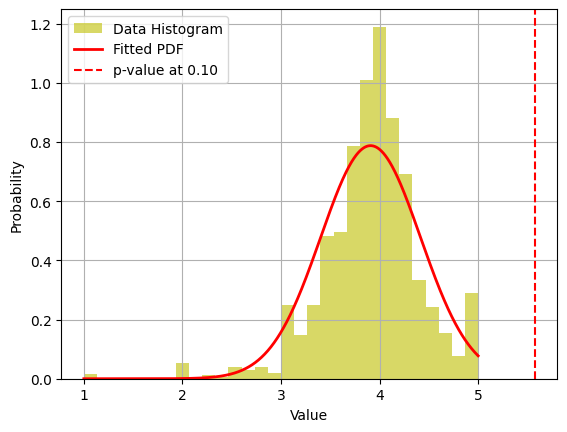

In [ ]:
from scipy.stats import norm

data = pd.concat([chunkH0,chunkH1])
mu, std = norm.fit(data)
x = np.linspace(min(data), max(data), 1000)
pdf = norm.pdf(x, mu, std)

plt.hist(data, bins=30, density=True, alpha=0.6, color='y', label='Data Histogram')
plt.plot(x, pdf, 'r-', lw=2, label='Fitted PDF')
plt.axvline(x=t_stat, color='r', linestyle='--', label='p-value at 0.10')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.grid()
plt.show()


The t-test calculates a t-statistic, which is a measure of the difference between the means of the two groups relative to the variance within each group. The larger the t-statistic, the more evidence there is for a significant difference between the groups. The test also produces a p-value, which indicates the probability of observing a t-statistic as extreme as the one calculated under H0 (assuming there is no difference between the groups).

If the p-value is less than alpha, you can reject the null hypothesis as the probability computed through the statistic's distribution is low.

Altought this seem all coherent to what we see in the plots (boxplot most of all) we must recall that this was not so appropriate. The distribution is not really normal (also testing with Shapiro and Anderson-Darling test), variances of the two population are not the same, we havent test for indipendence (but it was reasonable to prove it).


**Despite this the result seems coherent to data and to non parametrical test.**

Both Spearman's rank correlation and Kendall's tau correlation are suitable for detecting non-linear relationships when you have ordinal or non-normally distributed data.

In [ ]:
# Calculate Spearman's rank correlation
spearman_corr = X.corr(method='spearman')

print("Spearman's Rank Correlation:")
print(spearman_corr)

Spearman's Rank Correlation:
                average_rating  num_pages
average_rating        1.000000   0.109156
num_pages             0.109156   1.000000


In [ ]:
kendall_corr = X.corr(method='kendall')

print("Kendall's Tau Correlation:")
print(kendall_corr)

Kendall's Tau Correlation:
                average_rating  num_pages
average_rating        1.000000   0.076094
num_pages             0.076094   1.000000


correlation is indeed low

##Compare the average rate distribution for English and non-English books with a proper statistical procedure. What can you conclude about those two groups?

In [ ]:
# We search for all language isentifier for english as it is easier and more robust that to filter for the only one present in the Database
eng_tags = ['en-GB', 'en-CA', 'en-IN', 'enm', 'ang', 'en-US', 'en-AU', 'en-NZ', 'en-IE', 'eng']
#    'en' or 'eng': English (generic identifier), 'en-US': English (United States),  'en-GB': English (Great Britain), 'en-AU': English (Australia), 'en-IN': English (India)
#    'en-CA': English (Canada), 'en-NZ': English (New Zealand), 'en-IE': English (Ireland)

In [ ]:
# Initialize DataFrames for English and Non-English data
eng = pd.DataFrame()
oth = pd.DataFrame()

with pd.read_json("/content/drive/MyDrive/Data2/lighter_books.json", lines=True, chunksize=CHUNK_SIZE) as jreader:
    for chunk in jreader:
        # Selecting the two column involved
        chunk = chunk[['average_rating','language']]
        # Filtering respectivly language and average rating
        chunk = chunk[(chunk['language'] != '') & (chunk['language'] != 'Select... ') & (chunk['language'] !='--')]
        chunk = chunk[chunk['average_rating'] >0]
        #print(chunk)
        # Create two dataframe based on the language value: wether it matches or not the list eng_tags
        eng = pd.concat([chunk[chunk['language'].isin(eng_tags)]['average_rating']] ,axis =0)
        oth = pd.concat([chunk[~chunk['language'].isin(eng_tags)]['average_rating']],axis =0)
        # break


Let's visualize the distribution of our data in order to formulate our test properly.

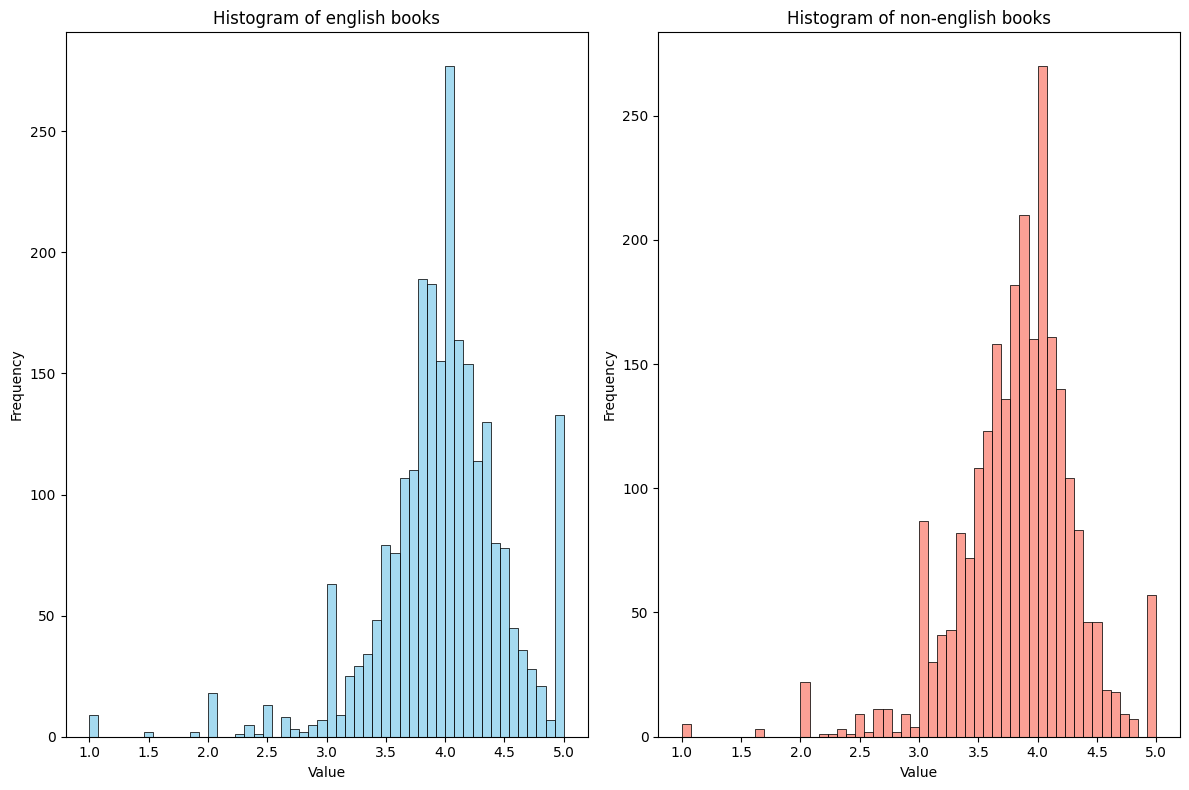

In [ ]:
# Create subplots for histograms and KDE plots
fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Plot histograms for data1 and data2
sns.histplot(data=eng, kde=False, color='skyblue', ax=axes[0])
sns.histplot(data=oth, kde=False, color='salmon', ax=axes[1])

# Set labels and titles for the plots
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of english books')

axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of non-english books')

# Adjust layout for subplots
plt.tight_layout()

# Show the plots
plt.show()


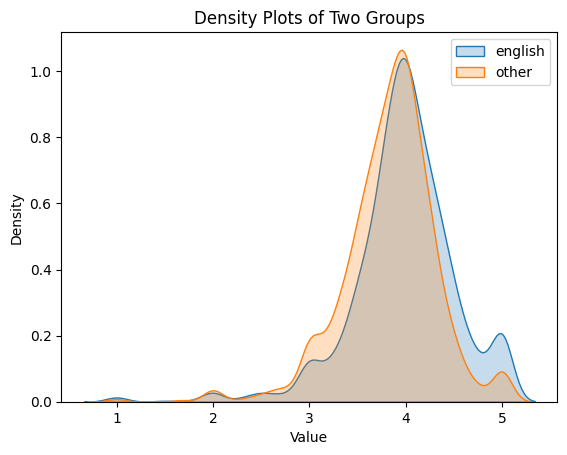

In [ ]:
# Create density plots for the two groups
sns.kdeplot(eng, label='english',fill=True)
sns.kdeplot(oth, label='other', fill=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.title('Density Plots of Two Groups')
plt.show()

We can compare the means of two groups chosen appropriately using a t-test. When conducting a statistical hypothesis test, we start with two opposing hypotheses: the null hypothesis (H0) and the alternative hypothesis (H1).

\begin{equation}
\begin{cases}
H_0: & \mu_{eng}-\mu_{oth}=0 \\
H_1: & \mu_{eng} - \mu_{oth} \neq 0
\end{cases}
\end{equation}

Where $\mu_{eng}$ is the average of the rating book evaluated on the english books (chunk_eng) and of course $\mu_{oth}$ is the average of the rating book evaluated on the other language witten books

**We want to test if there is a significant difference in the average ratings between books written in english and books NOT written in english.** Therefore, I set my null hypothesis (H0) as the average rating of books is not significantly affected by the english language. Readers do not usually rate english books as better (no effect), while my alternative hypothesis (H1) is that there is a significant difference. (The average rating of books is significantly affected by the language in which the book is written).


In [ ]:
# We choose not a strict alpha as it is a social dataframe, we could test for multiples alpha.
alpha=0.10

# Perform a two-sample t-test
t_stat1, p_value1 = stats.ttest_ind(eng, oth)

# Check the p-value against your chosen alpha
if p_value1 < alpha:
    print("Reject the null hypothesis H0")
else:
    print("Fail to reject the null hypothesis H1")

# Print the t-statistic and p-value
print("t-statistic:", t_stat1)
print("p-value:", p_value1)


Reject the null hypothesis H0
t-statistic: 9.963478804550558
p-value: 3.64260391998363e-23


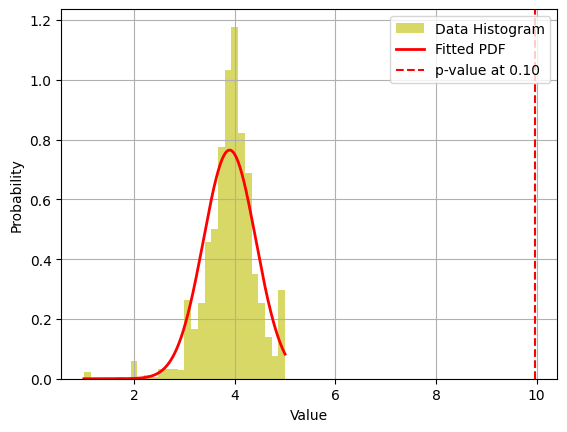

In [ ]:
from scipy.stats import norm

data = pd.concat([eng,oth])
mu, std = norm.fit(data)
x = np.linspace(min(data), max(data), 1000)
pdf = norm.pdf(x, mu, std)

plt.hist(data, bins=30, density=True, alpha=0.6, color='y', label='Data Histogram')
plt.plot(x, pdf, 'r-', lw=2, label='Fitted PDF')
plt.axvline(x=t_stat1, color='r', linestyle='--', label='p-value at 0.10')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.grid()
plt.show()


The t-test calculates a t-statistic, which is a measure of the difference between the means of the two groups relative to the variance within each group. The larger the t-statistic, the more evidence there is for a significant difference between the groups. The test also produces a p-value, which indicates the probability of observing a t-statistic as extreme as the one calculated under H0 (assuming there is no difference between the groups).

If the p-value is less than alpha, you can reject the null hypothesis as the probability computed through the statistic's distribution is low.

## About the two groups in the previous question, extract helpful statistics like mode, mean, median, and quartiles, explaining their role in a box plot.

Mode

In [ ]:
#Calculate the mode for english and non-english written books
print('The english-written book with the more frequent average rating score is',eng.mode()[0])
print('The NOT english-written book with the more frequent average rating score is',oth.mode()[0])
#As was proved in the two histograms

The english-written book with the more frequent average rating score is 4.0
The NOT english-written book with the more frequent average rating score is 4.0


Mean

In [ ]:
# We compute the average for each group
print('The average rating score number having a little number of pages',round(eng.mean(),3))
print('The average rating score number having a high number of pages',round(oth.mean(),3))


The average rating score number having a little number of pages 3.972
The average rating score number having a high number of pages 3.825


The two average are almost the same. This show indipendence between the language and the average rating.

Quartiles

In [ ]:
# We compute the average (parameter of our empiric distribution) for each group
print('The quartiles of rating score number of a book written in english are \n', round(eng.quantile([0.25, 0.5, 0.75]),3))
print('The quartiles of rating score number of a book not written in english are \n',round(oth.quantile([0.25, 0.5, 0.75]),3))

The quartiles of rating score number of a book written in english are 
 0.25    3.742
0.50    4.000
0.75    4.268
Name: average_rating, dtype: float64
The quartiles of rating score number of a book not written in english are 
 0.25    3.58
0.50    3.88
0.75    4.11
Name: average_rating, dtype: float64


We interpret quartiles as the values at which the probability of observing a value less than or equal to that specific value is equal to the quartile considered.

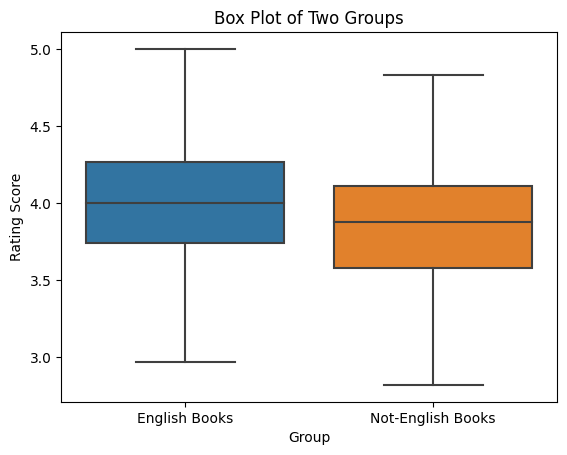

In [ ]:
data = pd.DataFrame({'value': pd.concat([eng, oth]),
                     'group': ['English Books'] * len(eng) + ['Not-English Books'] * len(oth)})

# Create box plots for the two groups
sns.boxplot(x='group', y='value', data=data,  showfliers=False)
plt.xlabel('Group')
plt.ylabel('Rating Score')
plt.title('Box Plot of Two Groups')
plt.show()

We interpret quartiles as the values at which the probability of observing a value less than or equal to that specific value is equal to the quartile considered. By examining quartiles, we can gain insights into the symmetry of the distribution and whether it has heavy or light tails. Additionally, boxplots provide us with information about the range of the distribution.

In a boxplot, the three quartiles are represented by horizontal lines. The middle line represents the median, which divides the distribution into two equal parts. The lower line corresponds to the first quartile. The closer it is to the median, the denser the data is for 'lower' values within the distribution's range. Similarly, the upper line corresponds to the third quartile, providing insights into the data's distribution for 'higher' values."

##It seems reasonable to assume that authors with more fans should have more reviews, but maybe their fans are a bit lazy. Confirm or reject this with a convenient statistical test or a predictive model.

As for some example performed in RQ1 we can compute easily the correlation between the two variable fans count and reviews count

In [ ]:
authors = pd.read_json("/content/drive/MyDrive/Data2/lighter_authors.json", lines=True)

Check easily computing correlation and doing a Person test

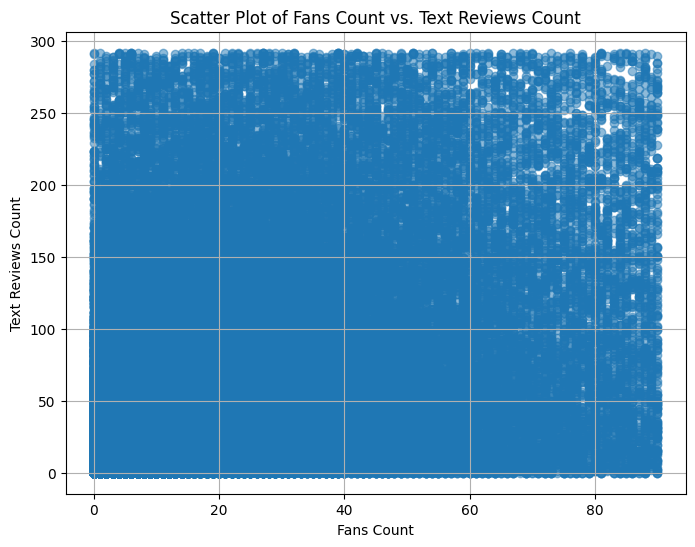

In [ ]:
#Select only interesting columns in corrispondence of positive fans_count values
filtered_data = authors[['fans_count','text_reviews_count']][authors['fans_count'] > 0]

# Filter outliers
# Define the lower and upper percentiles (10th and 90th in this case)
lower_percentile = 10
upper_percentile = 90

# Calculate the percentiles of 'fans_count'
lower_limit = authors['fans_count'].quantile(lower_percentile / 100)
upper_limit = authors['fans_count'].quantile(upper_percentile / 100)

# Filter data to exclude values outside the specified percentiles
filtered_data = authors[(authors['fans_count'] >= lower_limit) & (authors['fans_count'] <= upper_limit)]

# Calculate the percentiles of 'fans_count'
lower_limit1 = authors['text_reviews_count'].quantile(lower_percentile / 100)
upper_limit1 = authors['text_reviews_count'].quantile(upper_percentile / 100)

# Filter data to exclude values outside the specified percentiles
filtered_data = filtered_data[(filtered_data['text_reviews_count'] >= lower_limit1) & (filtered_data['text_reviews_count'] <= upper_limit1)]

# Extract the two variables for the scatter plot
fans_count = filtered_data['fans_count']
text_reviews_count = filtered_data['text_reviews_count']

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.scatter(fans_count, text_reviews_count, alpha=0.5)  # alpha controls point transparency
plt.title('Scatter Plot of Fans Count vs. Text Reviews Count')
plt.xlabel('Fans Count')
plt.ylabel('Text Reviews Count')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(filtered_data['fans_count'], filtered_data['text_reviews_count'])

# Evaluate the statistical significance
# Setting the significance level
alpha = 0.05
if p_value < alpha:
    significance = "statistically significant"
else:
    significance = "not statistically significant"

# Print the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-Value: {p_value:.8f}")
print(f"Statistical Significance: {significance}")


Pearson Correlation Coefficient: 0.55
P-Value: 0.00000000
Statistical Significance: statistically significant


Also we could fit an extremly semplified regressive model like Y~X where

 Y = {number of review} and

 X  = {number of fans of an author standardized}

 After computing the coefficients we can rewrite as:

$$\texttt{text_reviews_count}=\underset{(0.01)}{25.52}+\underset{(0.01)}{26.51}\cdot\widetilde{\texttt{fans_count}}$$

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'filtered_data' is your DataFrame
scaler = StandardScaler()

# Standardize the 'fans_count' variable
# Observe that it is not necessatìry since it is the only varible. We perform it to get a better interpretation.
X = scaler.fit_transform(filtered_data[['fans_count']])
y = filtered_data['text_reviews_count']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model without adding a constant term manually
model = sm.OLS(y, X)
results = model.fit()

# Print the regression summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     text_reviews_count   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                 1.345e+05
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        19:18:36   Log-Likelihood:            -1.5611e+06
No. Observations:              305681   AIC:                         3.122e+06
Df Residuals:                  305679   BIC:                         3.122e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.5158      0.072    353.026      0.0

In [ ]:
#Compute it for interpreter the model
print('mu =', round(filtered_data['fans_count'].mean()))
print('std =',round(filtered_data['fans_count'].std()))

mu = 9
std = 16


In [ ]:
#Number of text_reviews predicted by the model for 0 numbers of fans
round(25.5158+26.5094*(-9/38))

19

When an author has an average number of 9 fans, we expect an average of 26 text reviews. As the number of fans increases beyond the average, we project an additional 27 reviews, resulting in a total of 51 text reviews on average. Even when an author has no fans, we still predict an average of 19 reviews

R-squared and residuals are bad, which is predictable as we're modiling using only one variable. Gender, years of publication or average_rating would be considered in building a model.

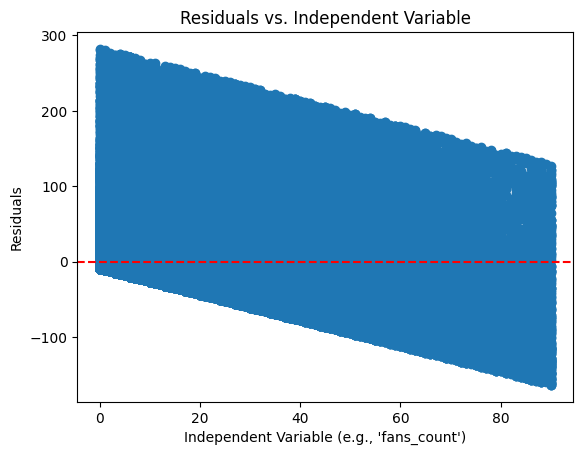

In [ ]:
# Create a scatter plot of residuals vs. independent variable (e.g., 'X')
plt.scatter(filtered_data['fans_count'], results.resid)
plt.xlabel("Independent Variable (e.g., 'fans_count')")
plt.ylabel("Residuals")
plt.title("Residuals vs. Independent Variable")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

To summarize, there is a linear relationship between the two variables. This is confirmed by assessing the correlation coefficient and conducting a Pearson test. Furthermore, the regression model reveals statistically significant positive coefficients.

**Moreover, the interpretation aligns with our initial hypothesis: having more fans is correclated with having more reviews.**

##Provide a short survey about helpful statistical tests in data analysis and mining: focus on hypothesis design and the difference between parametric and nonparametric tests, explaining the reasons behind the choice of one of these two tests.



Statistical tests are essential tools in data analysis and data mining. They are some tools which helps researchers and analysts draw meaningful conclusions from data.
We design the differences between parametric and nonparametric tests and mention the most important of those:


> **Parametric Testing**: These tests make assumptions about the data distribution. They assume that the data follows a specific probability distribution (e.g., normal distribution) driven by a parameter to be tested. Parametric tests are more powerful (as they make more strong assumptions), but less robust to violations of assumptions. Some famous examples are:
   - **T-Test**: used to compare means between two groups.
   - **ANOVA (Analysis of Variance)**: generalized version of the t-test which perform comparisons for more than two groups.
   - **Chi-Square Test**: used for examining relationships between categorical data (variables).

> **Nonparametric Tests**: Nonparametric tests are distribution-free and make minimal assumptions about the data. They are robust, may have less power but ensure the validity of statistical analyses when underlying assumptions cannot be met. Examples include the following tests:
   - **Wilcoxon Mann-Whitney U** :  it assesses whether the medians of the two groups are equal.
   - **Kruskal-Wallis** : generalized version of the previous one
   - **Spearman's Rank Correlation (Spearman's Rho)**: Spearman's rank correlation is a non-parametric measure of the strength and direction of a monotonic relationship between two variables.


> **Parametric or Nonparametric Tests?** :
Parametric tests are chosen when we have a clear understanding of the data distribution and are confident in assuming independence and homoscedasticity. Its referable to choose nonparametric tests when data distribution assumptions are violated. Additionally sometimes data cannot be transformed to meet parametric assumptions. When dealing with nominal or ordinal data usually non-parametric tests come to the forefront.

We design hypothesis tests for the mentioned scenarios.
First we formalize a statistic parametric model as:
$$M: \{\text{Y}, Y^n,p_n(Y|\theta),\theta \in \Theta \}$$ where
- Y is a random vector ($Y_1,\dots,Y_n$) which collection corrisponds to a single observation
- $Y^n$ sample space
- $p_n(Y|\theta)$ pdf determined by a vector of parameters $\theta$
- parameter space

Under the hypothesis of a normal model which variables are iid and with same variance we can formalize it as follows:
$$M: \{\text{Y}, Y^n,p_n(Y|(\mu,\sigma) = \prod_{i=1}^n \left(\dfrac{1}{\sqrt{2\pi}\sigma}exp\Big\{-\dfrac{1}{2}\left(\dfrac{(y_i-\mu)}{\sigma^2}\right)^2\Big\}\right), (\mu,\sigma) \in R×R^+\}$$

In each test we make different assumption:

**T-Test**

We consider two groups having two different mean and same sigma, indipendent and normal distributed. The partition of the parameters' space is then defined as:
\begin{equation}
\begin{cases}
H_0: & \mu_1=\mu_2 = \mu \\
H_1: & \mu_1 \neq \mu_2
\end{cases}
\end{equation}

It's called t-test because we prove the hypothesis trough a statistic which is distributed as a t-student distribution.


$$T(Y_n) = \dfrac{\mu_1-\mu_2}{\sqrt{\dfrac{2\sigma^2}{n}}} \sim t_{n-1}$$

were n is the numerosity of the single group, assuming groups have same numerosity. This is actually an empirical distribution: we computed theorical sigma through data ($s^2$).

If the statistic T is high this is due to a high difference between the means within the two groups.

**ANOVA (Analysis of Variance) Test**


We consider the mean of each group as a global mean and an effect associated to one of the two groups $\mu_i = \mu + \alpha_i \quad i=\{1,2,3,\dots,k\}$ where k is the total number of groups identified. In the alternaive hypothesis we have the event to see a differce between groups.
With $\sigma$ we identify the standard deviation within each group as by hypothesis: $\sigma_1 = \dots = \sigma_k = \sigma$

\begin{equation}
\begin{cases}
H_0: & \mu_1=\mu_2 = \dots = \mu_k \\
H_1: & \mu_1 \neq \mu_2 \neq \dots \mu_k
\end{cases}
\end{equation}

We then use the sum of square to built a useful statistic which looks like this:
$$F(Y_n) = \dfrac{\dfrac{n\sum_{i=1}^k(\mu_i-\mu)^2}{(k-1)\sigma^2}}{{\dfrac{s^2}{\sigma^2}}}\sim F_{k-1,n\cdot k}$$

We are testing if the variance within each group is much different from the global variance in the population

**Chi-Square Test**
With chi-squared test (refering to Pearson's version) we check if the observed frequencies in the dataset match the expected frequencies according to a specified distribution. The test calculates a chi-square statistic, which quantifies the difference between observed and expected frequencies. The larger the chi-square statistic, the greater the discrepancy between observed and expected values.



---


**Wilcoxon Mann-Whitney U Test**
To perform this non-parametric test you have to compute the statistic as well. You start by merging the data from both independent samples into a single dataset. Assign a rank to each data point in the combined dataset. These ranks are assigned in ascending order, starting from 1 for the smallest value and incrementing by 1 for each subsequent value. Calculate the sum of the ranks for the sample with the smaller size. This sum is the Mann-Whitney U statistic. Then you compute the statistic with the formula:

$$E(U) = \dfrac{n_1 \cdot (n_1 + n_2 + 1)}{2}$$
where n1 and n2 are the sample sizes.

The null hyothesis is the probability that an observation from one population (X) exceeds an observation from the second population (Y) is 0.5

\begin{equation}
\begin{cases}
H_0: P (X>Y) = 0.5\\
H_1: P (X>Y) \neq 0.5
\end{cases}
\end{equation}

#Bonus point 1

##[1.1] Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload authors.json dataset, and filter authors with at least 100 reviews. Do the same using Pandas and compare performance in terms of milliseconds.

In [ ]:
# Record the start time
start_time = time.time()

authors1 = pd.read_json("/content/drive/MyDrive/Data2/lighter_authors.json",lines=True)

authors1 = authors1[['id', 'text_reviews_count', 'name']]

# Creating a new column to store the total number of reviews for each author
authors1['count_reviews'] = authors1.groupby('name')['text_reviews_count'].transform('sum')

#Select authors with more than 100 reviews
authors1.loc[authors1['count_reviews']>=100]


# Record the end time
end_time = time.time()

# Calculate the elapsed time in milliseconds
elapsed_time = (end_time - start_time)*1000

# Print the elapsed time in seconds
print(f"Time taken: {elapsed_time} milliseconds")


Time taken: 31042.14835166931 milliseconds


In [ ]:
# Drop the unneccessary columns in 'Authors' dataset and store in a new dataset
#We keep id, text_reviews_count, name

import dask.dataframe as dd
# Record the start time
start_time = time.time()

authors2 = dd.read_json("/content/drive/MyDrive/Data2/lighter_authors.json")

authors2 = authors2[['id', 'text_reviews_count', 'name']]

# Creating a new column to store the total number of reviews for each author
authors2['count_reviews'] = authors2.groupby('name')['text_reviews_count'].transform('sum', meta=('x', 'f8'))

#Select authors with more than 100 reviews
authors2.loc[authors2['count_reviews']>=100]


# Record the end time
end_time = time.time()

# Calculate the elapsed time in milliseconds
elapsed_time = (end_time - start_time)*1000

# Print the elapsed time in seconds
print(f"Time taken: {elapsed_time} milliseconds")


Time taken: 35321.30241394043 milliseconds


We perform the selection by using Pandas and Dask. We see that Pandas performs better with this dataframe.

#Command line

* The following lines reads the series.json file and uses the jq command to  extract information from the file such as id,title and the total book count in the works section.

* The extracted data is then sorted based on the total book count in descending order.

* Only the first 5 lines are selected using the head -n5 command.

* Finally, the data is formatted using the awk command to present the results in a table with aligned columns.



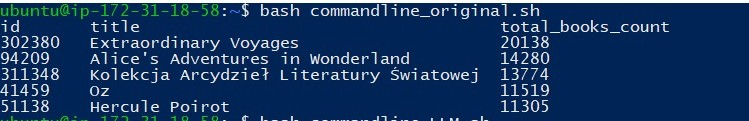

We submitted the original script to ChatGPT and among various implementation recommendations we selected the following:

> a check to ensure that the jq command is available in the system


> a check to verify that the series.json file exists

> the original core of the script

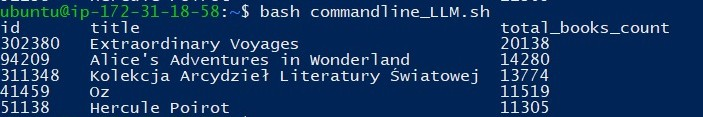

# AWS Question

We comment all fundamental step in order to solve the AWS question


##The information about the config of the EC2 instance

To have your instance running you can do the following steps:
*   Accessed your AWS profile search for EC2 and then for the orange button **"Launch istance"**. In order to have your instance up and running you must set some parameter such as:
  *   **Name** (as istance "HMW2_ADM"). The "Name" will be shown together with the list of your instances, so if may be useful to be some meaningful one related to the task its used for.
  *   It was choosen **Ubuntu** from the list of available Quick Start AMIs. As predictable, the type of Amazon Machine Image (AMI) determines the Operating System that will run on the EC2 instance that you launch.  
  *  Furthermore we selected the instance type which is related to the hardware resources. In this case we tried **t3.large** as it seemed the larger available in the free student plan.
  *   **Key** : a new pair key was created and saved. Remember the path of the key is important as if is needed for accessing from the terminal
  *   **Security Group** you are not able to access your web server because the security group is not permitting inbound traffic on port 80, which is used for HTTP web requests. You can update the security group by following this steps:
      * Return to the EC2 Management Console browser tab -> choose Security Groups in the left navigation pane, under Network & Security-> Web Server security group, which you created when launching your EC2 instance. In the lower pane, choose the Inbound rules tab ->create an inbound rule-> Edit-> add rule.   
      
          Configure the following:

              Type: HTTP

              Source: Anywhere-IPv4

    Choose Save rules

  *   **Storage** was set at 30GiB (8GiB is the deault one)

  Press finally Launch Instance and then View all instances. You'll see just at the right of the instance's Name the display of the connection. It'll move from "Connecting" to "Running 2/2" in few minutes at most.



###The command used to connect to the EC2
after moving in the directory were the key are stored, I execute from the terminal the following command:

ssh -i "mykey.pem" ubuntu@ec2-54-163-27-31.compute-1.amazonaws.com

which is available going from the istance "i-0671280e53909c4c3" (custum string) -> Connect to the instance -> Client SSH

###Upload the files and run the script on the EC2 instance through your local system

To have my file there i can upload it from the Bucket S3, and then, back from the terminal, execute

aws s3 cp s3://Name/file

then run it with

python3 file.py

In [ ]:
def pop_tags():
    counter = Counter()

    with pd.read_json("/to/define/path", lines=True, chunksize=CHUNK_SIZE_AWS) as jreader:
        for chunk in jreader:
            for x in chunk['tags']:
                if type(x) == list:
                    counter.update(x)

    for tags, count in counter.most_common(5):
        print(tags + ', ' + str(count))

start = time.time()
pop_tags()
print(time.time() - start)

##  Frequency of the most popular tags

<table>
  <tr>
    <td>romance</td>
    <td>6001</td>
  </tr>
  <tr>
    <td>fiction</td>
    <td>5291</td>
  </tr>
  <tr>
    <td>young-adult</td>
    <td>5016</td>
  </tr>
  <tr>
    <td>science-fiction</td>
    <td>2779</td>
  </tr>
</table>



##  Running time
<div style="text-align: center;">
<table>
  <tr>
    <td></td>
    <td>runnig time</td>
    <td>chunk size</td>
  </tr>
  <tr>
    <td>local system</td>
    <td>~12.0207</td>
    <td>100</td>
  </tr>
  <tr>
    <td>EC2 istance</td>
    <td>~33.1070</td>
    <td>100</td>
  </tr>
</table>
<div>

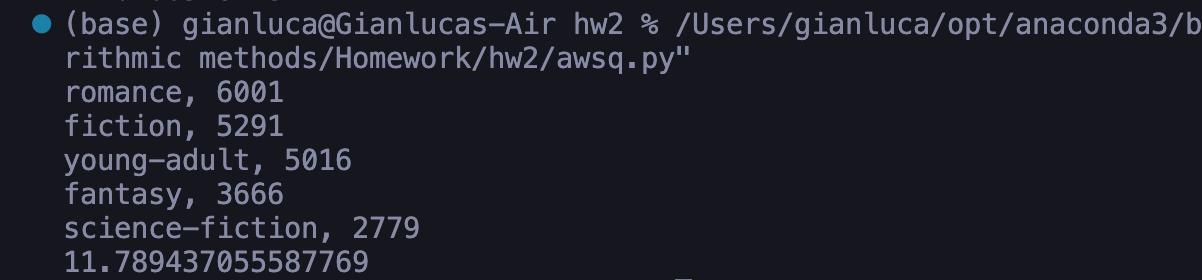

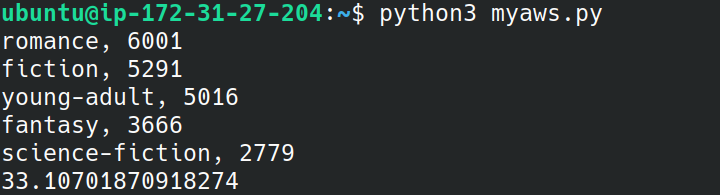

# Algorithmic Question

This is the solution we came up with to solve the algorithimc question. We implemented it using a *deque*, that allows us to perform *append* operation on both right and left side.

In [ ]:
# initialize collection deque (has been imported on the first part of the notebook)
operations = deque([])

# open the input file, it's uploaded on my drive
with open('/content/drive/MyDrive/hw2_adm/input2.txt', 'r') as file:
    # these variables count how many elements there are in the 2 dictionaries
    # and will be used as indexes for the ids
    left_count = 0
    right_count = 0
    # initialize the dictionaries
    left = {}
    right = {}
    # iterate over the file
    for line in file:
        line = line.strip().split()
        # divide each input line
        flag = line[0]
        id = line[1]
        #checks about the flag
        if flag == 'L':
            # if 'L', add the element to 'left', as a value he has the inner index left_count
            left[id] = left_count
            # update left_count
            left_count += 1
        elif flag == 'R':
          # if 'R', add the element to 'right', as a value he has the inner index right_count
            right[id] = right_count
            # update right_count
            right_count += 1
        else:
          # check if 'id' in left dict
            if id in left:
                # the first parameter compute the actual distance from the leftmost element
                # indeed, the second parameter compute the distance from the rightmost element
                print(min(left_count - left[id] - 1,left[id] + right_count + 2))
            # else 'id' in right dict
            else:
                # the first parameter compute the distance form the leftmost element
                # the second parameter compute the distance from the rightmost element
                print(min(left_count + right[id] + 2,right_count - right[id] - 1))

1
2
0
6


##Ask ChatGPT or any other LLM chatbot tool to check your code's time complexity (the Big O notation). Do you believe this is correct? How can you double-check it? Elaborate about your answer

Then, we asked _ChatGPT_ about the time complexity of our code, it answered us this:

The time complexity of this code can be analyzed operation by operation:

1. **"L" Operation (left shelf):** This operation involves adding an element to the `left` dictionary. Adding an element to a dictionary is generally an O(1) operation in Python. Therefore, the time complexity of the "L" operation is O(1).

2. **"R" Operation (right shelf):** This operation involves adding an element to the `right` dictionary. Similar to the "L" operation, it's also an O(1) operation.

3. **"?" Operation:** This operation includes dictionary lookups and basic arithmetic calculations. The time complexity of dictionary lookups is O(1) on average, and the arithmetic operations are also O(1). Therefore, the time complexity of the "?" operation is O(1).

Now, let's consider the entire loop that processes the input file:

- The loop reads each line in the input file, and for each line, one of the three types of operations is performed: "L," "R," or "?."
- Each operation within the loop has a time complexity of O(1), as explained above.

Therefore, the overall time complexity of the loop that processes the entire input file is O(n), where "n" is the number of operations in the file. This is because the loop iterates through the file once, and each operation within the loop has constant time complexity.

In summary, the provided code has a linear time complexity of O(n) with respect to the number of operations in the input file. It should be efficient for processing a reasonable number of operations, making it suitable for the tasks at hand.

We add some more consideration to what just reported from _ChatGPT_

*   we solved this eercise avoing list and using instead dictionaries. This as more efficient as allow to access data with complexity O(1)
* for each element we performe a costant number of operation
* for '?' we copute the minimum which is O(2) because we are just comparing two numbers. Furthermore we don't have to compute the length of each dictionary because it's already saved in the counters ('left_count', 'right_count')





##Is it an optimal algorithm?


Given that the operations we perform are O(1), the only issue is the size of the input. We think that our solution could be one high-performance solution.